In [2]:
import sys
import os

# Add the parent directory (project root) to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Randomness

## JAX

In [1]:
from general_python.algebra.utils import get_backend as __backend
from general_python.algebra.ran_wrapper import uniform, randint
# test random
seed    = None
backend = 'np'
for i in range(5):
    modules = __backend(backend, random=True, seed=seed)
    backend, (rnd_module, key) = modules if isinstance(modules, tuple) else (modules, (None, None))
    print(f"backend: {backend}")
    print(f"key: {key}")
    print(f"rnd_module: {rnd_module}")
    print(f"rnd_module.random(): {rnd_module.random()}")
    print(f"rnd_module.randint(0, 10): {rnd_module.integers(0, 10)}")
    print(f"rnd_module.uniform(0, 10): {rnd_module.uniform(0, 10)}")
    print(f"rnd_module.normal(0, 1): {rnd_module.normal(0, 1)}")
    # take the function from random wrapper
    print(f"uniform(0, 10): {uniform(shape=(5,),minval=0, maxval=10, backend=backend, seed=seed)}")
    print()

INFO:general_python.algebra.utils:63: JAX backend available and successfully imported
INFO:general_python.algebra.utils:63: 	JAX 64-bit precision enabled.
INFO:general_python.algebra.utils:262: Setting JAX as the active backend.
INFO:general_python.algebra.utils:63: **************************************************
INFO:general_python.algebra.utils:63: Backend Configuration:
INFO:general_python.algebra.utils:63: 		NumPy Version: 2.1.3
INFO:general_python.algebra.utils:63: 		SciPy Version: 1.15.2
INFO:general_python.algebra.utils:63: 		JAX Version: 0.5.3
INFO:general_python.algebra.utils:63: 		Active Backend: jax
INFO:general_python.algebra.utils:63: 			JAX Available: True
INFO:general_python.algebra.utils:63: 			Default Seed: 42
INFO:general_python.algebra.utils:63: 		JAX Backend Details:
INFO:general_python.algebra.utils:63: 				Main Module: jax.numpy
INFO:general_python.algebra.utils:63: 				Random Module: jax.random (+ PRNGKey)
INFO:general_python.algebra.utils:63: 				SciPy Module

backend: <module 'numpy' from '/Users/makskliczkowski/miniconda3/lib/python3.12/site-packages/numpy/__init__.py'>
key: None
rnd_module: Generator(PCG64)
rnd_module.random(): 0.7739560485559633
rnd_module.randint(0, 10): 6
rnd_module.uniform(0, 10): 8.585979199113824
rnd_module.normal(0, 1): 0.9405647163912139
uniform(0, 10): [7.73956049 4.3887844  8.5859792  6.97368029 0.94177348]

backend: <module 'numpy' from '/Users/makskliczkowski/miniconda3/lib/python3.12/site-packages/numpy/__init__.py'>
key: None
rnd_module: Generator(PCG64)
rnd_module.random(): 0.7739560485559633
rnd_module.randint(0, 10): 6
rnd_module.uniform(0, 10): 8.585979199113824
rnd_module.normal(0, 1): 0.9405647163912139
uniform(0, 10): [7.73956049 4.3887844  8.5859792  6.97368029 0.94177348]

backend: <module 'numpy' from '/Users/makskliczkowski/miniconda3/lib/python3.12/site-packages/numpy/__init__.py'>
key: None
rnd_module: Generator(PCG64)
rnd_module.random(): 0.7739560485559633
rnd_module.randint(0, 10): 6
rnd_modu

# Models
This set of 

## Operators Test with all backends

In [1]:
from general_python.lattices.honeycomb import HoneycombLattice
from general_python.lattices.lattice import LatticeBC
import general_python.common.binary as bin_mod
import numpy as np

backend = 'np'
lat     = HoneycombLattice( dim     = 2,
                            lx      = 2,
                            ly      = 2,
                            lz      = 1,
                            bc      = LatticeBC.PBC)
lat

=== Backend Initialization ===
	NumPy Version: 1.26.4
	SciPy Version: 1.13.1
	JAX Version: Not Available
		Active Backend: jax
		JAX Available: True
		Default Random Key: [    0 12345]
	Active Backend Modules:
			Main Module: <module 'jax.numpy' from '/Users/makskliczkowski/miniconda3/lib/python3.12/site-packages/jax/numpy/__init__.py'>
			Random Module: <module 'jax.random' from '/Users/makskliczkowski/miniconda3/lib/python3.12/site-packages/jax/random.py'>
			SciPy Module: <module 'jax.scipy' from '/Users/makskliczkowski/miniconda3/lib/python3.12/site-packages/jax/scipy/__init__.py'>
=== End of Backend Info ===


HON,LatticeBC.PBC,d=2,Ns=8,Lx=2,Ly=2,Lz=1

### Local operators test

In [16]:
# create an operator
import Algebra.Operator.operators_spin as op_spin
import jax.numpy as jnp

sig_x = op_spin.sig_x(
    lattice  = lat,
    type_act = op_spin.OperatorTypeActing.Local
)
sig_z = op_spin.sig_z(
    lattice  = lat,
    type_act = op_spin.OperatorTypeActing.Local
)

# create a set of states and test it
int_state = np.random.randint(0, 2**lat.ns, dtype=np.int32)
np_state  = np.ones((lat.ns), dtype = np.float64)
jnp_state = jnp.ones((lat.ns), dtype = jnp.float64)

int_state, np_state, jnp_state

(129,
 array([1., 1., 1., 1., 1., 1., 1., 1.]),
 Array([1., 1., 1., 1., 1., 1., 1., 1.], dtype=float64))

#### Integer states

In [13]:
print(f"Before: {bin_mod.int2binstr(int_state, lat.ns)}")
for i in range(lat.ns):
    print(f"i: {i})")
    print("\tSigma Z")
    # sig_z
    int_state_mod, int_state_mod_val = sig_z(int_state, i)
    print(f"\t\tAfter {i}'th s_z: ({int_state_mod[0]})b{bin_mod.int2binstr(int_state_mod[0], lat.ns)} with value {int_state_mod_val}")
    print("\tSigma X")
    # sig_x
    int_state_mod, int_state_mod_val = sig_x(int_state, i)
    print(f"\t\tAfter {i}'th s_x: ({int_state_mod[0]})b{bin_mod.int2binstr(int_state_mod[0], lat.ns)} with value {int_state_mod_val}")

Before: 00011101
i: 0)
	Sigma Z
		After 0'th s_z: (29)b00011101 with value [-0.5]
	Sigma X
		After 0'th s_x: (157)b10011101 with value [0.5]
i: 1)
	Sigma Z
		After 1'th s_z: (29)b00011101 with value [-0.5]
	Sigma X
		After 1'th s_x: (93)b01011101 with value [0.5]
i: 2)
	Sigma Z
		After 2'th s_z: (29)b00011101 with value [-0.5]
	Sigma X
		After 2'th s_x: (61)b00111101 with value [0.5]
i: 3)
	Sigma Z
		After 3'th s_z: (29)b00011101 with value [0.5]
	Sigma X
		After 3'th s_x: (13)b00001101 with value [0.5]
i: 4)
	Sigma Z
		After 4'th s_z: (29)b00011101 with value [0.5]
	Sigma X
		After 4'th s_x: (21)b00010101 with value [0.5]
i: 5)
	Sigma Z
		After 5'th s_z: (29)b00011101 with value [0.5]
	Sigma X
		After 5'th s_x: (25)b00011001 with value [0.5]
i: 6)
	Sigma Z
		After 6'th s_z: (29)b00011101 with value [-0.5]
	Sigma X
		After 6'th s_x: (31)b00011111 with value [0.5]
i: 7)
	Sigma Z
		After 7'th s_z: (29)b00011101 with value [0.5]
	Sigma X
		After 7'th s_x: (28)b00011100 with value [0.5]


#### Numpy states

In [ ]:
for i in range(lat.ns):
    print(f"i: {i})")
    sites            = [i]
    np_modified_x, _ = sig_x(np_state, *sites)
    np_modified_z, _ = sig_z(np_state, *sites)
    print(f"Before: {np_state}, acting on sites {sites}")
    print(f"After X: {np_modified_x}")
    print(f"After Z: {np_modified_z}")

i: 0)


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
Failed in nopython mode pipeline (step: nopython frontend)
Invalid use of getiter with parameters (int64)

During: typing of intrinsic-call at /Users/makskliczkowski/Codes/QuantumEigenSolver/Python/QES/Algebra/Operator/operators_spin.py (143)

File "Algebra/Operator/operators_spin.py", line 143:
def sigma_x_np(state    : np.ndarray,
    <source elided>
    out     = state.copy()
    for site in sites:
    ^

During: resolving callee type: type(CPUDispatcher(<function sigma_x_np at 0x165d05120>))
During: typing of call at /Users/makskliczkowski/Codes/QuantumEigenSolver/Python/QES/Algebra/Operator/operator.py (1639)

During: resolving callee type: type(CPUDispatcher(<function sigma_x_np at 0x165d05120>))
During: typing of call at /Users/makskliczkowski/Codes/QuantumEigenSolver/Python/QES/Algebra/Operator/operator.py (1639)

During: resolving callee type: type(CPUDispatcher(<function sigma_x_np at 0x165d05120>))
During: typing of call at /Users/makskliczkowski/Codes/QuantumEigenSolver/Python/QES/Algebra/Operator/operator.py (1639)

During: resolving callee type: type(CPUDispatcher(<function sigma_x_np at 0x165d05120>))
During: typing of call at /Users/makskliczkowski/Codes/QuantumEigenSolver/Python/QES/Algebra/Operator/operator.py (1639)


File "Algebra/Operator/operator.py", line 1639:
        def fun_np(state, i):
            return op_func_np(state, i, *extra_args)
            ^


#### Jax states

In [7]:
for i in range(lat.ns):
    print(f"i: {i})")
    sites            = [i]
    jnp_modified_x, _ = sig_x(jnp_state.copy(), sites[0])
    jnp_modified_z, _ = sig_z(jnp_state.copy(), sites[0])
    print(f"Before: {jnp_state}, acting on sites {sites}")
    print(f"After X: {jnp_modified_x}")
    print(f"After Z: {jnp_modified_z}")

i: 0)
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [0]
After X: [-1.  1.  1.  1.  1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
i: 1)
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [1]
After X: [ 1. -1.  1.  1.  1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
i: 2)
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [2]
After X: [ 1.  1. -1.  1.  1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
i: 3)
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [3]
After X: [ 1.  1.  1. -1.  1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
i: 4)
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [4]
After X: [ 1.  1.  1.  1. -1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
i: 5)
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [5]
After X: [ 1.  1.  1.  1.  1. -1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
i: 6)
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [6]
After X: [ 1.  1.  1.  1.  1.  1. -1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
i: 7)
Before: [1. 1. 1. 1. 

### Correlation

In [8]:
# create an operator
import Algebra.Operator.operators_spin as op_spin
import jax.numpy as jnp

sig_x = op_spin.sig_x(
    lattice  = lat,
    type_act = op_spin.OperatorTypeActing.Correlation
)
sig_z = op_spin.sig_z(
    lattice  = lat,
    type_act = op_spin.OperatorTypeActing.Correlation
)

# create a set of states and test it
int_state = np.random.randint(0, 2**lat.ns, dtype=np.int32)
np_state  = np.ones((lat.ns), dtype = np.float64)
jnp_state = jnp.ones((lat.ns), dtype = jnp.float64)

int_state, np_state, jnp_state

(229,
 array([1., 1., 1., 1., 1., 1., 1., 1.]),
 Array([1., 1., 1., 1., 1., 1., 1., 1.], dtype=float64))

#### Integer states

In [9]:
print(f"Before: {bin_mod.int2binstr(int_state, lat.ns)}")
for i in range(lat.ns):
    sites = [i, (i+1)%lat.ns]
    print(f"i: {i})")
    print("\tSigma Z")
    # sig_z
    int_state_mod, int_state_mod_val = sig_z(int_state, *sites)
    print(f"\t\tAfter {sites}'th s_z: ({int_state_mod[0]})b{bin_mod.int2binstr(int_state_mod[0], lat.ns)} with value {int_state_mod_val}")
    print("\tSigma X")
    # sig_x
    sites = [i, (i+1)%lat.ns]
    int_state_mod, int_state_mod_val = sig_x(int_state, *sites)
    print(f"\t\tAfter {sites}'th s_x: ({int_state_mod[0]})b{bin_mod.int2binstr(int_state_mod[0], lat.ns)} with value {int_state_mod_val}")

Before: 11100101
i: 0)
	Sigma Z
		After [0, 1]'th s_z: (229)b11100101 with value [0.25]
	Sigma X
		After [0, 1]'th s_x: (37)b00100101 with value [0.25]
i: 1)
	Sigma Z
		After [1, 2]'th s_z: (229)b11100101 with value [0.25]
	Sigma X
		After [1, 2]'th s_x: (133)b10000101 with value [0.25]
i: 2)
	Sigma Z
		After [2, 3]'th s_z: (229)b11100101 with value [-0.25]
	Sigma X
		After [2, 3]'th s_x: (213)b11010101 with value [0.25]
i: 3)
	Sigma Z
		After [3, 4]'th s_z: (229)b11100101 with value [0.25]
	Sigma X
		After [3, 4]'th s_x: (253)b11111101 with value [0.25]
i: 4)
	Sigma Z
		After [4, 5]'th s_z: (229)b11100101 with value [-0.25]
	Sigma X
		After [4, 5]'th s_x: (233)b11101001 with value [0.25]
i: 5)
	Sigma Z
		After [5, 6]'th s_z: (229)b11100101 with value [-0.25]
	Sigma X
		After [5, 6]'th s_x: (227)b11100011 with value [0.25]
i: 6)
	Sigma Z
		After [6, 7]'th s_z: (229)b11100101 with value [-0.25]
	Sigma X
		After [6, 7]'th s_x: (230)b11100110 with value [0.25]
i: 7)
	Sigma Z
		After [7, 0

#### Numpy states

In [10]:
for i in range(lat.ns):
    print(i)
    sites            = [i, (i+1)%lat.ns]
    np_modified_x, _ = sig_x(np_state.copy(), *sites)
    np_modified_z, _ = sig_z(np_state.copy(), *sites)
    print(f"Before: {np_state}, acting on sites {sites}")
    print(f"After X: {np_modified_x}")
    print(f"After Z: {np_modified_z}")

0
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [0, 1]
After X: [-1. -1.  1.  1.  1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
1
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [1, 2]
After X: [ 1. -1. -1.  1.  1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
2
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [2, 3]
After X: [ 1.  1. -1. -1.  1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
3
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [3, 4]
After X: [ 1.  1.  1. -1. -1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
4
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [4, 5]
After X: [ 1.  1.  1.  1. -1. -1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
5
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [5, 6]
After X: [ 1.  1.  1.  1.  1. -1. -1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
6
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [6, 7]
After X: [ 1.  1.  1.  1.  1.  1. -1. -1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
7
Before: [1. 1. 1. 1. 1. 1. 1. 1.

#### JAX states

In [14]:
for i in range(lat.ns):
    print(i)
    sites            = [i, (i+1)%lat.ns]
    jnp_modified_x, _ = sig_x(jnp_state.copy(), *sites)
    jnp_modified_z, _ = sig_z(jnp_state.copy(), *sites)
    print(f"Before: {jnp_state}, acting on sites {sites}")
    print(f"After X: {jnp_modified_x}")
    print(f"After Z: {jnp_modified_z}")

0
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [0, 1]
After X: [-1. -1.  1.  1.  1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
1
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [1, 2]
After X: [ 1. -1. -1.  1.  1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
2
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [2, 3]
After X: [ 1.  1. -1. -1.  1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
3
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [3, 4]
After X: [ 1.  1.  1. -1. -1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
4
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [4, 5]
After X: [ 1.  1.  1.  1. -1. -1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
5
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [5, 6]
After X: [ 1.  1.  1.  1.  1. -1. -1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
6
Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [6, 7]
After X: [ 1.  1.  1.  1.  1.  1. -1. -1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]
7
Before: [1. 1. 1. 1. 1. 1. 1. 1.

### Globals

In [17]:
# create an operator
import Algebra.Operator.operators_spin as op_spin
import jax.numpy as jnp
sites = [0, 2]
sig_x = op_spin.sig_x(
    lattice  = lat,
    sites    = sites
)
sig_z = op_spin.sig_z(
    lattice  = lat,
    sites    = sites
)

# create a set of states and test it
int_state = np.random.randint(0, 2**lat.ns, dtype=np.int32)
np_state  = np.ones((lat.ns), dtype = np.float64)
jnp_state = jnp.ones((lat.ns), dtype = jnp.float64)

int_state, np_state, jnp_state

(164,
 array([1., 1., 1., 1., 1., 1., 1., 1.]),
 Array([1., 1., 1., 1., 1., 1., 1., 1.], dtype=float64))

#### Integer states

In [18]:
int_modified_x, _ = sig_x(int_state)
int_modified_z, _ = sig_z(int_state)
print(f"Before: {bin_mod.int2binstr(int_state, lat.ns)}, acting on sites {sites}")
print(f"After X: {bin_mod.int2binstr(int_modified_x[0], lat.ns)}")
print(f"After Z: {bin_mod.int2binstr(int_modified_z[0], lat.ns)}")

Before: 10100100, acting on sites [0, 2]
After X: 00000100
After Z: 10100100


#### Numpy

In [19]:
np_modified_x, _ = sig_x(np_state.copy())
np_modified_z, _ = sig_z(np_state.copy())
print(f"Before: {np_state}, acting on sites {sites}")
print(f"After X: {np_modified_x}")
print(f"After Z: {np_modified_z}")

Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [0, 2]
After X: [-1.  1. -1.  1.  1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]


#### JNP

In [21]:
jnp_modified_x, _ = sig_x(jnp_state.copy())
jnp_modified_z, _ = sig_z(jnp_state.copy())
print(f"Before: {jnp_state}, acting on sites {sites}")
print(f"After X: {jnp_modified_x}")
print(f"After Z: {jnp_modified_z}")

Before: [1. 1. 1. 1. 1. 1. 1. 1.], acting on sites [0, 2]
After X: [-1.  1. -1.  1.  1.  1.  1.  1.]
After Z: [1. 1. 1. 1. 1. 1. 1. 1.]


## Any Hamiltonian defined from the operators

Underneath, the Hamiltonian is constructed using the defined operators, such as `sig_x` and `sig_z`, which act on specific sites or globally on the lattice. These operators are combined with appropriate multipliers to represent the physical interactions in the system. The Hamiltonian is then built, diagonalized, and used to compute eigenvalues, eigenvectors, and other properties of the quantum system.


In [24]:
import numpy as np
import Algebra.hamil as hamil
from Algebra.Operator.operator import  test_operators
from general_python.lattices.honeycomb import HoneycombLattice
from general_python.lattices.lattice import LatticeBC

backend = 'np'
lat     = HoneycombLattice( dim     = 2,
                            lx      = 2,
                            ly      = 2,
                            lz      = 1,
                            bc      = LatticeBC.PBC)
ham     = hamil.Hamiltonian(
    hilbert_space   = None,
    is_sparse       = True,
    dtype           = np.float64,
    lattice         = lat,
    backend         = backend,
)
print(lat)
print()
# create a set of states and test it
(int_state, np_state, jnp_state), operators = hamil.test_generic_hamiltonian(ham=ham, ns=lat.ns)
sig_x, sig_z, sig_z_0, sig_x_2, sig_z_sig_z, sig_z_loc, sig_x_loc, sig_z_cor = operators
print(f"int_state: {int_state}")
print(f"np_state: {np_state}")
print(f"jnp_state: {jnp_state}")

# reset the Hamiltonian operators
ham.reset_operators()

# add operators to the Hamiltonian
ham.add(
    operator    = sig_x,
    multiplier  = 1.0,
    sites       = None,
    # modifies    = True
)

ham.add(
    operator    = sig_z,
    multiplier  = 0.5,
    sites       = None,
    # modifies    = False
)

# add some local s_z
ham.add(
    operator    = sig_z_loc,
    multiplier  = -5.0,
    sites       = [5],
    # modifies    = False
)

# add some local s_x
ham.add(
    operator    = sig_x_loc,
    multiplier  = -5.0,
    sites       = [4],
    # modifies    = True
)

ham._set_local_energy_functions()

07_04_2025_12-04_59 [INFO] 		->[Hamiltonian] Adding modifying operator Operator(Sx/0-2, eigval=1.0, type=Other) at site 0 (global) with multiplier 1.0
07_04_2025_12-04_59 [INFO] 		->[Hamiltonian] Adding non-modifying operator Operator(Sz/0-2, eigval=1.0, type=Other) at site 0 (global) with multiplier 0.5
07_04_2025_12-04_59 [INFO] 		->[Hamiltonian] Adding non-modifying operator Operator(Sz/L, eigval=1.0, type=Other) at site 5 (sites: [5]) with multiplier -5.0
07_04_2025_12-04_59 [INFO] 		->[Hamiltonian] Adding modifying operator Operator(Sx/L, eigval=1.0, type=Other) at site 4 (sites: [4]) with multiplier -5.0
07_04_2025_12-04_59 [WARNING] 		->[Hamiltonian] Max local changes set to 4
07_04_2025_12-04_59 [INFO] 		->[Hamiltonian] Successfully set local energy functions...


HON,LatticeBC.PBC,d=2,Ns=8,Lx=2,Ly=2,Lz=1

Operator: Sx/0-2, OperatorTypeActing.Global
Operator: Sz/0-2, OperatorTypeActing.Global
Operator: Sz/0, OperatorTypeActing.Global
Operator: Sx/0-2 * 2, OperatorTypeActing.Global
Operator: Sz/0 * Sz/0-2, OperatorTypeActing.Global
Operator: Sz/L, OperatorTypeActing.Local
Operator: Sx/L, OperatorTypeActing.Local
Operator: Sz/C, OperatorTypeActing.Correlation
int_state: 11
np_state: [ 1. -1.  1. -1. -1.  1.  1.  1.]
jnp_state: [ 1. -1.  1. -1. -1.  1.  1.  1.]


### Integer states

##### $\sigma _x^0 \sigma_x^2 |\psi ^{\rm int}\rangle$

In [27]:
out = test_operators(sig_x, int_state, ns = lat.ns, output_format='tabs')

,Test Expression,Initial State,Operator,Result,Time Measurement
0,op(state),"(11), which is b00001011",Sx/0-2,"[171], which is ['b10101011'] with [0.25]",6.92 us +- 4.81 us per loop (mean +- std. dev....
1,op[state],"(11), which is b00001011",Sx/0-2,[171],4.81 us +- 1.01 us per loop (mean +- std. dev....
2,op[op[state]],"(11), which is b00001011",Sx/0-2,[11],The slowest run took 6.35 times longer than th...
3,op % state,"(11), which is b00001011",Sx/0-2,[0.25],5.93 us +- 1.93 us per loop (mean +- std. dev....


##### $\sigma _z^0 \sigma_z^2 |\psi ^{\rm int}\rangle$

In [6]:
out = test_operators(sig_z, int_state, ns = lat.ns, output_format='tabs')

,Test Expression,Initial State,Operator,Result,Time Measurement
0,op(state),"(226), which is b11100010",Sz/0-2,"[226], which is ['b11100010'] with [0.25]",The slowest run took 3424.93 times longer than...
1,op[state],"(226), which is b11100010",Sz/0-2,[226],5.45 us +- 1.08 us per loop (mean +- std. dev....
2,op[op[state]],"(226), which is b11100010",Sz/0-2,[226],The slowest run took 3624.08 times longer than...
3,op % state,"(226), which is b11100010",Sz/0-2,[0.25],6.24 us +- 2.62 us per loop (mean +- std. dev....


##### $2 * \sigma _x^0 \sigma_x^2 |\psi ^{\rm int}\rangle$

In [7]:
out = test_operators(sig_x_2, int_state, ns = lat.ns, output_format='tabs')

,Test Expression,Initial State,Operator,Result,Time Measurement
0,op(state),"(226), which is b11100010",Sx/0-2 * 2,"[66], which is ['b01000010'] with [0.5]",The slowest run took 16.03 times longer than t...
1,op[state],"(226), which is b11100010",Sx/0-2 * 2,[66],The slowest run took 6.01 times longer than th...
2,op[op[state]],"(226), which is b11100010",Sx/0-2 * 2,[226],The slowest run took 9.29 times longer than th...
3,op % state,"(226), which is b11100010",Sx/0-2 * 2,[0.5],6.93 us +- 1.02 us per loop (mean +- std. dev....


##### $\sigma _z (i) |\psi ^{\rm int}\rangle$

In [8]:
out = test_operators(sig_z_loc, int_state, ns = lat.ns, output_format='tabs', add_args=(5,))

,Test Expression,Initial State,Operator,Result,Time Measurement
0,"op(state, 5)","(226), which is b11100010",Sz/L,"[226], which is ['b11100010'] with [-0.5]",The slowest run took 2837.46 times longer than...
1,"op[state, 5]","(226), which is b11100010",Sz/L,[226],5.6 us +- 1.61 us per loop (mean +- std. dev. ...
2,"op % state, 5","(226), which is b11100010",Sz/L,[-0.5],Timeit error: Operator._apply_local() missing ...


##### $\sigma _z^0  (\sigma _z^0 \sigma_x^2) |\psi ^{\rm int}\rangle$

In [4]:
# %timeit -r 5 -n 20 sig_z_sig_z(int_state)
sig_z_sig_z(int_state)

TypeError: Pred must be a scalar, got Traced<ShapedArray(bool[1])>with<DynamicJaxprTrace(level=1/1)> of shape (1,).

##### $H |\psi ^{\rm int} \rangle $

In [2]:
%%timeit -r 5 -n 20
for i in range(lat.ns):
    ham.loc_energy(k = int_state, i = i)

The slowest run took 123.21 times longer than the fastest. This could mean that an intermediate result is being cached.
13 ms ± 25 ms per loop (mean ± std. dev. of 5 runs, 20 loops each)


In [4]:
for i in range(lat.ns):
    print(ham.loc_energy(k = int_state, i = i))

(array([ 66, 226]), array([0.25 , 0.125]))
(array([], dtype=float64), array([], dtype=float64))
(array([], dtype=float64), array([], dtype=float64))
(array([], dtype=float64), array([], dtype=float64))
(array([234, 226]), array([-2.5,  0. ]))
(array([], dtype=float64), array([], dtype=float64))
(array([], dtype=float64), array([], dtype=float64))
(array([], dtype=float64), array([], dtype=float64))


### Numpy states

##### $\sigma _x^0 \sigma_x^2 |\psi ^{\rm np}\rangle$

In [9]:
out = test_operators(sig_x, np_state, ns = lat.ns, output_format='tabs')

,Test Expression,Initial State,Operator,Result,Time Measurement
0,op(state),[1. 1. 1. 1. 1. 1. 1. 1.],Sx/0-2,[-1. 1. -1. 1. 1. 1. 1. 1.] with 0.25,The slowest run took 16876.83 times longer tha...
1,op[state],[1. 1. 1. 1. 1. 1. 1. 1.],Sx/0-2,[-1. 1. -1. 1. 1. 1. 1. 1.],3.24 us +- 875 ns per loop (mean +- std. dev. ...
2,op[op[state]],[1. 1. 1. 1. 1. 1. 1. 1.],Sx/0-2,[1. 1. 1. 1. 1. 1. 1. 1.],5.49 us +- 792 ns per loop (mean +- std. dev. ...
3,op % state,[1. 1. 1. 1. 1. 1. 1. 1.],Sx/0-2,0.25,2.89 us +- 592 ns per loop (mean +- std. dev. ...


##### $\sigma _z^0 \sigma_z^2 |\psi ^{\rm np}\rangle$

In [10]:
out = test_operators(sig_z, np_state, ns = lat.ns, output_format='tabs')

,Test Expression,Initial State,Operator,Result,Time Measurement
0,op(state),[1. 1. 1. 1. 1. 1. 1. 1.],Sz/0-2,[1. 1. 1. 1. 1. 1. 1. 1.] with 0.25,The slowest run took 15923.14 times longer tha...
1,op[state],[1. 1. 1. 1. 1. 1. 1. 1.],Sz/0-2,[1. 1. 1. 1. 1. 1. 1. 1.],2.49 us +- 643 ns per loop (mean +- std. dev. ...
2,op[op[state]],[1. 1. 1. 1. 1. 1. 1. 1.],Sz/0-2,[1. 1. 1. 1. 1. 1. 1. 1.],4.35 us +- 696 ns per loop (mean +- std. dev. ...
3,op % state,[1. 1. 1. 1. 1. 1. 1. 1.],Sz/0-2,0.25,2.24 us +- 461 ns per loop (mean +- std. dev. ...


##### $2 * \sigma _x^0 \sigma_x^2 |\psi ^{\rm np}\rangle$

In [11]:
out = test_operators(sig_x_2, np_state, ns = lat.ns, output_format='tabs')

,Test Expression,Initial State,Operator,Result,Time Measurement
0,op(state),[1. 1. 1. 1. 1. 1. 1. 1.],Sx/0-2 * 2,[-1. 1. -1. 1. 1. 1. 1. 1.] with 0.5,4.14 us +- 2.96 us per loop (mean +- std. dev....
1,op[state],[1. 1. 1. 1. 1. 1. 1. 1.],Sx/0-2 * 2,[-1. 1. -1. 1. 1. 1. 1. 1.],3.06 us +- 861 ns per loop (mean +- std. dev. ...
2,op[op[state]],[1. 1. 1. 1. 1. 1. 1. 1.],Sx/0-2 * 2,[1. 1. 1. 1. 1. 1. 1. 1.],7.82 us +- 3.44 us per loop (mean +- std. dev....
3,op % state,[1. 1. 1. 1. 1. 1. 1. 1.],Sx/0-2 * 2,0.5,3.16 us +- 1.55 us per loop (mean +- std. dev....


##### $H |\psi ^{\rm np} \rangle $

In [11]:
%timeit -r 5 -n 5 ham.loc_energy(k = np_state)
ham.loc_energy(k = np_state)

The slowest run took 4.38 times longer than the fastest. This could mean that an intermediate result is being cached.
172 μs ± 91 μs per loop (mean ± std. dev. of 5 runs, 5 loops each)


(array([[ 1.,  1.,  1., -1.,  1., -1., -1.,  1.],
        [ 1.,  1.,  1., -1., -1., -1., -1.,  1.],
        [-1.,  1., -1., -1.,  1., -1., -1.,  1.]]),
 array([ 2.625, -2.5  ,  0.25 ]))

### JAX states

##### $\sigma _x^0 \sigma_x^2 |\psi ^{\rm jax}\rangle$

In [19]:
out = test_operators(sig_x, jnp_state, ns = lat.ns, output_format='tabs')

,Test Expression,Initial State,Operator,Result,Time Measurement
0,op(state),[1. 1. 1. 1. 1. 1. 1. 1.],Sx/0-2,[-1. 1. -1. 1. 1. 1. 1. 1.] with 0.25,The slowest run took 1093.45 times longer than...
1,op[state],[1. 1. 1. 1. 1. 1. 1. 1.],Sx/0-2,[-1. 1. -1. 1. 1. 1. 1. 1.],25.2 us +- 3.37 us per loop (mean +- std. dev....
2,op[op[state]],[1. 1. 1. 1. 1. 1. 1. 1.],Sx/0-2,[1. 1. 1. 1. 1. 1. 1. 1.],50.8 us +- 7.69 us per loop (mean +- std. dev....
3,op % state,[1. 1. 1. 1. 1. 1. 1. 1.],Sx/0-2,0.25,24.1 us +- 1.9 us per loop (mean +- std. dev. ...


##### $\sigma _z^0 \sigma_z^2 |\psi ^{\rm jax}\rangle$

In [9]:
out = test_operators(sig_z, jnp_state, ns = lat.ns, output_format='tabs')

,Test Expression,Initial State,Operator,Result,Time Measurement
0,op(state),[1. 1. 1. 1. 1. 1. 1. 1.],Sz/0-2,[1. 1. 1. 1. 1. 1. 1. 1.] with 0.25,The slowest run took 640.85 times longer than ...
1,op[state],[1. 1. 1. 1. 1. 1. 1. 1.],Sz/0-2,[1. 1. 1. 1. 1. 1. 1. 1.],6.11 us +- 1.6 us per loop (mean +- std. dev. ...
2,op[op[state]],[1. 1. 1. 1. 1. 1. 1. 1.],Sz/0-2,[1. 1. 1. 1. 1. 1. 1. 1.],11.1 us +- 1.49 us per loop (mean +- std. dev....
3,op % state,[1. 1. 1. 1. 1. 1. 1. 1.],Sz/0-2,0.25,6.14 us +- 1.23 us per loop (mean +- std. dev....


##### $2 * \sigma _x^0 \sigma_x^2 |\psi ^{\rm jax}\rangle$

In [20]:
out = test_operators(sig_x_2, jnp_state, ns = lat.ns, output_format='tabs')

,Test Expression,Initial State,Operator,Result,Time Measurement
0,op(state),[1. 1. 1. 1. 1. 1. 1. 1.],Sx/0-2 * 2,[-1. 1. -1. 1. 1. 1. 1. 1.] with 0.5,The slowest run took 376.77 times longer than ...
1,op[state],[1. 1. 1. 1. 1. 1. 1. 1.],Sx/0-2 * 2,[-1. 1. -1. 1. 1. 1. 1. 1.],23.8 us +- 2.18 us per loop (mean +- std. dev....
2,op[op[state]],[1. 1. 1. 1. 1. 1. 1. 1.],Sx/0-2 * 2,[1. 1. 1. 1. 1. 1. 1. 1.],60.3 us +- 18.2 us per loop (mean +- std. dev....
3,op % state,[1. 1. 1. 1. 1. 1. 1. 1.],Sx/0-2 * 2,0.5,The slowest run took 8.86 times longer than th...


##### $H |\psi ^{\rm jax} \rangle $

In [8]:
%timeit -r 5 -n 5 result = ham.loc_energy(k=jnp_state)
ham.loc_energy(k=jnp_state)

The slowest run took 2603.02 times longer than the fastest. This could mean that an intermediate result is being cached.
8.07 ms ± 16.1 ms per loop (mean ± std. dev. of 5 runs, 5 loops each)


(Array([[ 1.,  1.,  1., -1.,  1., -1., -1.,  1.],
        [ 1.,  1.,  1., -1., -1., -1., -1.,  1.],
        [-1.,  1., -1., -1.,  1., -1., -1.,  1.]], dtype=float32),
 Array([ 2.625, -2.5  ,  0.25 ], dtype=float64))

### Build matrix

In [12]:
ham.build(verbose=True, use_numpy=True)

02_04_2025_01-08_49 [INFO] 	->[Hamiltonian] Building the Hamiltonian matrix...
02_04_2025_01-08_49 [INFO] 		->[Hamiltonian] Initialization completed in 0.000155 seconds
02_04_2025_01-08_49 [INFO] 		->[Hamiltonian] Calculating the Hamiltonian matrix using NumPy...
02_04_2025_01-08_49 [INFO] 	->[Hamiltonian] Hamiltonian matrix built in 0.182382 seconds.


In [10]:
ham.diagonalize(verbose=True)

02_04_2025_01-08_28 [INFO] 	->[Hamiltonian] Diagonalization started using (standard)...
02_04_2025_01-08_28 [INFO] 		->[Hamiltonian] Diagonalization (standard) completed in 0.059722 seconds.


(array([-5.375, -5.375, -5.375, -5.375, -5.375, -5.375, -5.375, -5.375,
        -5.375, -5.375, -5.375, -5.375, -5.375, -5.375, -5.375, -5.375,
        -5.125, -5.125, -5.125, -5.125, -5.125, -5.125, -5.125, -5.125,
        -5.125, -5.125, -5.125, -5.125, -5.125, -5.125, -5.125, -5.125,
        -4.875, -4.875, -4.875, -4.875, -4.875, -4.875, -4.875, -4.875,
        -4.875, -4.875, -4.875, -4.875, -4.875, -4.875, -4.875, -4.875,
        -4.625, -4.625, -4.625, -4.625, -4.625, -4.625, -4.625, -4.625,
        -4.625, -4.625, -4.625, -4.625, -4.625, -4.625, -4.625, -4.625,
        -0.375, -0.375, -0.375, -0.375, -0.375, -0.375, -0.375, -0.375,
        -0.375, -0.375, -0.375, -0.375, -0.375, -0.375, -0.375, -0.375,
        -0.375, -0.375, -0.375, -0.375, -0.375, -0.375, -0.375, -0.375,
        -0.375, -0.375, -0.375, -0.375, -0.375, -0.375, -0.375, -0.375,
        -0.125, -0.125, -0.125, -0.125, -0.125, -0.125, -0.125, -0.125,
        -0.125, -0.125, -0.125, -0.125, -0.125, -0.125, -0.125, 

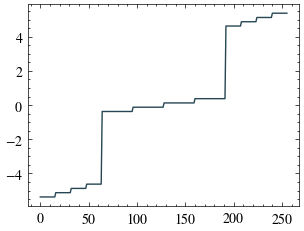

In [11]:
import matplotlib.pyplot as plt
plt.plot(ham.eig_val)
ham.eig_val, ham.eig_vec, ham.eig_vec.shape

## Heisenberg - Kitaev model

In [1]:
from Algebra.Model.Interacting.Spin.heisenberg_kitaev import HeisenbergKitaev, HEI_KIT_Z_BOND_NEI, HEI_KIT_X_BOND_NEI, HEI_KIT_Y_BOND_NEI
from general_python.lattices.honeycomb import HoneycombLattice
from general_python.lattices.lattice import LatticeBC

backend = 'np'
lat     = HoneycombLattice( dim     = 2,
                            lx      = 2,
                            ly      = 2,
                            lz      = 1,
                            bc      = LatticeBC.PBC)
lat

=== Backend Initialization ===
	NumPy Version: 1.26.4
	SciPy Version: 1.13.1
	JAX Version: Not Available
		Active Backend: jax
		JAX Available: True
		Default Random Key: [    0 12345]
	Active Backend Modules:
			Main Module: <module 'jax.numpy' from '/home/klimak/libraries/anaconda3/lib/python3.11/site-packages/jax/numpy/__init__.py'>
			Random Module: <module 'jax.random' from '/home/klimak/libraries/anaconda3/lib/python3.11/site-packages/jax/random.py'>
			SciPy Module: <module 'jax.scipy' from '/home/klimak/libraries/anaconda3/lib/python3.11/site-packages/jax/scipy/__init__.py'>
=== End of Backend Info ===


HON,LatticeBC.PBC,d=2,Ns=8,Lx=2,Ly=2,Lz=1

#### Printout the neighbors

In [2]:
# for i in range(lat.ns):
#     print(f"site {i}:")
#     n_nei = lat.get_nn_forward_num(i)
#     print(f"\tn_nei:{n_nei}")
    
#     for j in range(n_nei):
#         nei = lat.get_nn_forward(i, j)
#         print(f"\t\tnei {j}:\t{nei}", end='')
#         if j == HEI_KIT_Z_BOND_NEI:
#             print(f"\t\t\tbond Z")
#         elif j == HEI_KIT_Y_BOND_NEI:
#             print(f"\t\t\tbond Y")
#         elif j == HEI_KIT_X_BOND_NEI:
#             print(f"\t\t\tbond X")

#### GO!

In [3]:
hx      = 0.5
hz      = -0.3
j       = 1.0
kx      = 1.0
ky      = 1.0
kz      = 1.0
dlt     = 1.0

hamil   = HeisenbergKitaev(lattice      = lat, 
                        hilbert_space   = None, 
                        hx              = hx,
                        hz              = hz,
                        kx              = kx,
                        ky              = ky,
                        kz              = kz,
                        j               = j,
                        dlt             = dlt, 
                        dtype           = float,
                        backend         = backend)

In [4]:
hamil.build(verbose=True, use_numpy=True)
print(f"Memory:{hamil.memory_gb:.3e}gb")

Memory:6.104e-05gb


In [5]:
hamil.diagonalize(verbose=True)

(array([-6.44211693e+00, -5.92610809e+00, -5.34411037e+00, -4.76205750e+00,
        -4.45309041e+00, -4.39228435e+00, -4.26935329e+00, -4.19720199e+00,
        -4.14771635e+00, -4.13904170e+00, -4.02741320e+00, -3.95159616e+00,
        -3.88109805e+00, -3.70049653e+00, -3.60505299e+00, -3.48265996e+00,
        -3.47705959e+00, -3.46626615e+00, -3.27091704e+00, -3.25497709e+00,
        -3.13839839e+00, -3.12171530e+00, -3.11695191e+00, -3.11080783e+00,
        -3.08889167e+00, -3.06699614e+00, -3.06577808e+00, -2.85840130e+00,
        -2.78537589e+00, -2.78094245e+00, -2.77333462e+00, -2.72018788e+00,
        -2.66808075e+00, -2.66798999e+00, -2.60994032e+00, -2.60128268e+00,
        -2.58409053e+00, -2.54121064e+00, -2.50833066e+00, -2.49994427e+00,
        -2.40397998e+00, -2.37248032e+00, -2.35561307e+00, -2.34097147e+00,
        -2.32876190e+00, -2.24981481e+00, -2.21285296e+00, -2.13647581e+00,
        -2.10929097e+00, -2.03923428e+00, -1.99407335e+00, -1.96276039e+00,
        -1.9

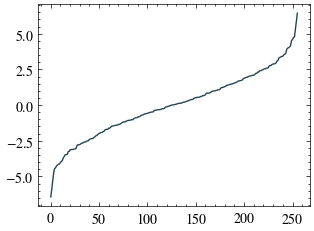

In [6]:
import matplotlib.pyplot as plt
plt.plot(hamil.eig_val)
hamil.eig_val, hamil.eig_vec, hamil.eig_vec.shape

Minimum value: -4.0
Maximum value: 5.2


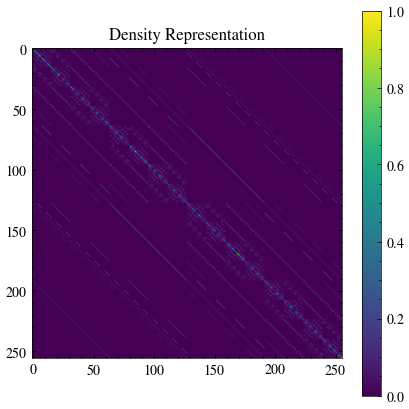

<256x256 sparse matrix of type '<class 'numpy.float64'>'
	with 5376 stored elements in Compressed Sparse Row format>

In [7]:
import numpy as np
# make dense
qsm_dense   = hamil.hamil.todense() if hamil.sparse else hamil.hamil
minimum     = qsm_dense.min()
maximum     = qsm_dense.max()
qsm_dense   = np.abs(qsm_dense) / np.abs(qsm_dense).max()

print("Minimum value:", minimum)
print("Maximum value:", maximum)

plt.figure(figsize=(5, 5))
plt.imshow(qsm_dense, cmap='viridis')
plt.colorbar()
plt.title("Density Representation")
plt.show()
hamil.hamil

## Quantum Sun Model

In [7]:
from Algebra.Model.Interacting.Spin.qsm import QSM
backend = 'np'
hamil   = QSM(ns=6, hilbert_space=None, n=3, a=0.64, h=1.0, xi=0.2, backend=backend, dtype='float64')
hamil.h

array([1.09830875, 0.68673419, 1.17275604])

#### Build

##### Sparse

In [8]:
hamil.build(verbose=True, use_numpy=True)
print(f"Memory:{hamil.memory_gb:.3e}gb")

Memory:8.110e-06gb


In [10]:
hamil.diagonalize(verbose=True)

In [11]:
hamil.eig_val[-5:]

array([1.50045918, 1.53956738, 1.69939926, 1.88216289, 2.14070568])

In [12]:
from general_python.physics.eigenlevels import gap_ratio
gap_ratio(hamil.eig_val, 1.0)['mean']

/home/klimak/Codes/QuantumEigenSolver/Python/QES/general_python/physics/eigenlevels.py:106: RuntimeWarning: invalid value encountered in divide
  gap_ratios = np.minimum(d_en[:-1], d_en[1:]) / np.maximum(d_en[:-1], d_en[1:])


nan

In [13]:
np.sqrt(np.trace((hamil.hamil * hamil.hamil).todense()))

11.844281113283797

##### Dense

In [14]:
hamil.to_dense()

In [12]:
hamil.build(verbose=True, use_numpy=True)

23_03_2025_21-56_00 [INFO] 	->[Quantum Sun Model] Building the Hamiltonian matrix...
23_03_2025_21-56_00 [INFO] 		->[Quantum Sun Model] Initialization completed in 0.000401 seconds
23_03_2025_21-56_01 [INFO] 	->[Quantum Sun Model] Hamiltonian matrix built in 0.064316 seconds.


In [13]:
hamil.diagonalize(verbose=True)

23_03_2025_21-56_01 [INFO] [Quantum Sun Model] Diagonalization (standard) completed in 0.091391 seconds.


In [14]:
hamil.h_memory_gb

23_03_2025_21-56_02 [INFO] 	->[Quantum Sun Model] Checking the memory used by the Hamiltonian matrix of type <class 'numpy.matrix'>


0.001953125

##### Plot tests

(array([-2.34531496, -2.11798111, -2.05381417, -1.77434138, -1.68752715,
        -1.61777998, -1.5142981 , -1.40167197, -1.3743069 , -1.24799662,
        -1.22757864, -1.12739028, -1.03491133, -0.94421676, -0.90879457,
        -0.89215716, -0.86991355, -0.79161961, -0.7841528 , -0.73561609,
        -0.60509698, -0.58112498, -0.5567302 , -0.53965873, -0.48245229,
        -0.4122751 , -0.40239185, -0.32426685, -0.2654296 , -0.24201167,
        -0.20965288, -0.18040775, -0.10389064, -0.06509441, -0.03179272,
        -0.02241905,  0.04461932,  0.13452145,  0.16620679,  0.26036263,
         0.29958855,  0.31675937,  0.3427217 ,  0.38618413,  0.42452586,
         0.45552848,  0.50484907,  0.59743343,  0.62706459,  0.66137275,
         0.70891361,  0.7939359 ,  0.89690373,  0.93771098,  0.99153836,
         1.11496683,  1.11661861,  1.23095887,  1.33844484,  1.50045918,
         1.53956738,  1.69939926,  1.88216289,  2.14070568]),
 array([[ 5.10949240e-01,  3.28695086e-01, -2.53144595e-01, ..

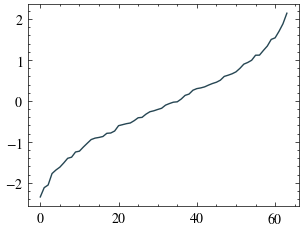

In [12]:
import matplotlib.pyplot as plt
plt.plot(hamil.eig_val)
hamil.eig_val, hamil.eig_vec, hamil.eig_vec.shape

Minimum value: -1.8001851646795513
Maximum value: 1.5759584299232352


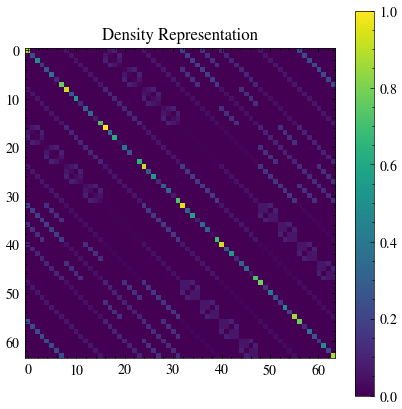

In [15]:
import numpy as np
# make dense
qsm_dense   = hamil.hamil.todense() if hamil.sparse else hamil.hamil
minimum     = qsm_dense.min()
maximum     = qsm_dense.max()
qsm_dense   = np.abs(qsm_dense) / np.abs(qsm_dense).max()

print("Minimum value:", minimum)
print("Maximum value:", maximum)

plt.figure(figsize=(5, 5))
plt.imshow(qsm_dense, cmap='viridis')
plt.colorbar()
plt.title("Density Representation")
plt.show()

##### Operators

In [16]:
from Algebra.Operator.operators_spin import sig_x, sig_z, OperatorTypeActing
from general_python.common import binary
import numpy as np

backend     = 'np'
ns          = 2
nh          = 2**ns   
sites       = [ns - 1]
# sites       = [0]
sig_x_op    = sig_x(ns = ns, type_act = OperatorTypeActing.Global, sites = sites)
sig_z_op    = sig_z(ns = ns, type_act = OperatorTypeActing.Global, sites = sites)
eye_first   = np.eye(2**(ns - 1))
eye_first

array([[1., 0.],
       [0., 1.]])

###### Check how it works on the base states

###### With states

In [17]:
int_state_full          = 2**(ns) - 1
int_state_half          = 2**(ns - 1) - 1
int_state_half_size     = 2**(ns//2) - 1

# binary representation
backend_state           = binary.int2base(int_state_full, size=ns, backend=backend)
backend_state_half      = binary.int2base(int_state_half, size=ns, backend=backend)
backend_state_half_size = binary.int2base(int_state_half_size, size=ns//2, backend=backend)
# string representation
string_state            = binary.int2binstr(int_state_full, bits=ns)
string_state_half       = binary.int2binstr(int_state_half, bits=ns)
string_state_half_size  = binary.int2binstr(int_state_half_size, bits=ns)

# act on the integer states
for state in [int_state_full, int_state_half, int_state_half_size]:
    print()
    # sigma x
    print("Applying sigma_x")
    print(f"Acting on state {state} ({binary.int2binstr(state, bits=ns)})")
    resulting_state, resulting_value = sig_x_op(state)
    print(f"\tResulting state: {resulting_state[0]}")
    print(f"\tResulting value: {resulting_value}")
    print(f"\tBinary representation of resulting state: {binary.int2binstr(resulting_state[0], bits=ns)}")
    # sigma z
    print("Applying sigma_z")
    resulting_state, resulting_value = sig_z_op(state)
    print(f"Resulting state: {resulting_state[0]}")
    print(f"Resulting value: {resulting_value}")
    print(f"Binary representation of resulting state: {binary.int2binstr(resulting_state[0], bits=ns)}")
    print()



Applying sigma_x
Acting on state 3 (11)
	Resulting state: 2
	Resulting value: [0.5]
	Binary representation of resulting state: 10
Applying sigma_z
Resulting state: 3
Resulting value: [0.5]
Binary representation of resulting state: 11


Applying sigma_x
Acting on state 1 (01)
	Resulting state: 0
	Resulting value: [0.5]
	Binary representation of resulting state: 00
Applying sigma_z
Resulting state: 1
Resulting value: [0.5]
Binary representation of resulting state: 01


Applying sigma_x
Acting on state 1 (01)
	Resulting state: 0
	Resulting value: [0.5]
	Binary representation of resulting state: 00
Applying sigma_z
Resulting state: 1
Resulting value: [0.5]
Binary representation of resulting state: 01



Are the two matrices (sig_x) equal? False
Are the two matrices (sig_z) equal? False
From the operator (sig_x)


Matrix([
[0.0, 0.5, 0.0, 0.0],
[0.5, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.5],
[0.0, 0.0, 0.5, 0.0]])

From the operator (sig_z)


Matrix([
[-0.5, 0.0,  0.0, 0.0],
[ 0.0, 0.5,  0.0, 0.0],
[ 0.0, 0.0, -0.5, 0.0],
[ 0.0, 0.0,  0.0, 0.5]])

From tensor (sig_x)


Matrix([
[0.0, 0.0, 0.5, 0.0],
[0.0, 0.0, 0.0, 0.5],
[0.5, 0.0, 0.0, 0.0],
[0.0, 0.5, 0.0, 0.0]])

From tensor (sig_z)


Matrix([
[-0.5,  0.0, 0.0, 0.0],
[ 0.0, -0.5, 0.0, 0.0],
[ 0.0,  0.0, 0.5, 0.0],
[ 0.0,  0.0, 0.0, 0.5]])

###### With Hamiltonian

###### Matrix

100%|██████████| 6/6 [00:04<00:00,  1.23it/s]


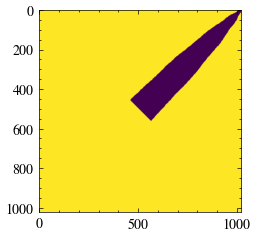

In [21]:
import numpy as np
from Algebra.Model.Interacting.Spin.qsm import QSM
from general_python.algebra.linalg import act, overlap
from general_python.common.plot import Plotter, colorsCycle
from general_python.maths.statistics import Statistics, HistogramAverage, Fraction
from Algebra.Operator.operators_spin import sig_x, sig_z, OperatorTypeActing
import matplotlib.pyplot as plt
from tqdm import tqdm

dtype           = 'float64'
nrealizations   = (np.array([100, 100, 100, 50, 30, 20])/5).astype(int)
# nrealizations   = (np.array([1, 1, 1, 1, 1, 1])).astype(int)
alpha           = 0.8
histograms_x    = {}
histograms_z    = {}
diagonals_x     = {}
diagonals_z     = {}
energies        = {}
nss             = [6,7,8,9,10]
# nss             = [10, 11]

# nss             = [9,10,11]
# nrealizations   = [10]

def set_histogram(hamiltonian, hist_sig_x: HistogramAverage, hist_sig_z: HistogramAverage, nbins):
    bandwidth       = hamiltonian.get_bandwidth()
    omax            = bandwidth * 3
    omin            = 0.1 / hamiltonian.hilbert_size
    tolerance       = 0.02 * bandwidth
    hist_sig_x.reset(nbins=nbins)
    hist_sig_x.uniform_log(v_max=omax, v_min=omin)
    hist_sig_z.reset(nbins=nbins)
    hist_sig_z.uniform_log(v_max=omax, v_min=omin)
    return tolerance

for ii, ns in enumerate(nss):
    realizations    = nrealizations[ii] if ii < len(nrealizations) else nrealizations[-1]
    energies[ns]    = []
    diagonals_x[ns] = []
    diagonals_z[ns] = []
    nh              = 2**ns
    # sites           = [0]
    sites           = [ns - 1]
    # sites           = [0]
    sig_x_op        = sig_x(ns = ns, type_act = OperatorTypeActing.Global, sites = sites)
    sig_z_op        = sig_z(ns = ns, type_act = OperatorTypeActing.Global, sites = sites)
    sig_x_op_mat    = sig_x_op.matrix(dim = nh, matrix_type = 'sparse', use_numpy = True)
    sig_z_op_mat    = sig_z_op.matrix(dim = nh, matrix_type = 'sparse', use_numpy = True)
    histogram_sig_x = HistogramAverage(dtype=dtype)
    histogram_sig_z = HistogramAverage(dtype=dtype)
    nbins           = int(20 * np.log2(nh))
    tolerance       = 0.0
    for realization in tqdm(range(realizations)):
        # print(f"Realization {realization + 1}/{nrealizations}")
        hamil       = QSM(ns=ns, hilbert_space=None, n=3, a=alpha, h=1.0, xi=0.2, backend = 'np', dtype='float64')
        hamil.build(verbose=False, use_numpy=True)
        hamil.diagonalize(verbose=False)
        states      = hamil.eig_vec
        eigvals     = hamil.eig_val
        sig_x_elems = overlap(states, states, sig_x_op_mat, backend = backend)
        sig_z_elems = overlap(states, states, sig_z_op_mat, backend = backend)
        diag_sig_x  = sig_x_elems.diagonal()
        diag_sig_z  = sig_z_elems.diagonal()
        if realization == 0:
            tolerance = set_histogram(hamil, histogram_sig_x, histogram_sig_z, nbins)
        # get the average energy
        energy_at       = hamil.av_en
        # create the f_functions by taking the middle spectrum (%)
        w, i_idx, j_idx = Fraction.spectral_function_fraction(eigvals, energy_at, tolerance)
        ones            = np.ones_like(sig_x_elems)
        ones[i_idx, j_idx] = 0
        plt.imshow(ones)
        # fill the histogram
        sig_x_changed   = np.abs(sig_x_elems[i_idx, j_idx])**2
        sig_z_changed   = np.abs(sig_z_elems[i_idx, j_idx])**2
        histogram_sig_x.append(w, sig_x_changed)
        histogram_sig_z.append(w, sig_z_changed)
        diagonals_x[ns].append(diag_sig_x)
        diagonals_z[ns].append(diag_sig_z)
        energies[ns].append(eigvals)
    histograms_x[ns] = histogram_sig_x
    histograms_z[ns] = histogram_sig_z
    

ns = 6, gap_ratio = 0.48863644874963236
ns = 7, gap_ratio = 0.5215722215035214
ns = 8, gap_ratio = 0.5063610408931543
ns = 9, gap_ratio = 0.5169201928774829
ns = 10, gap_ratio = 0.5106269653733807


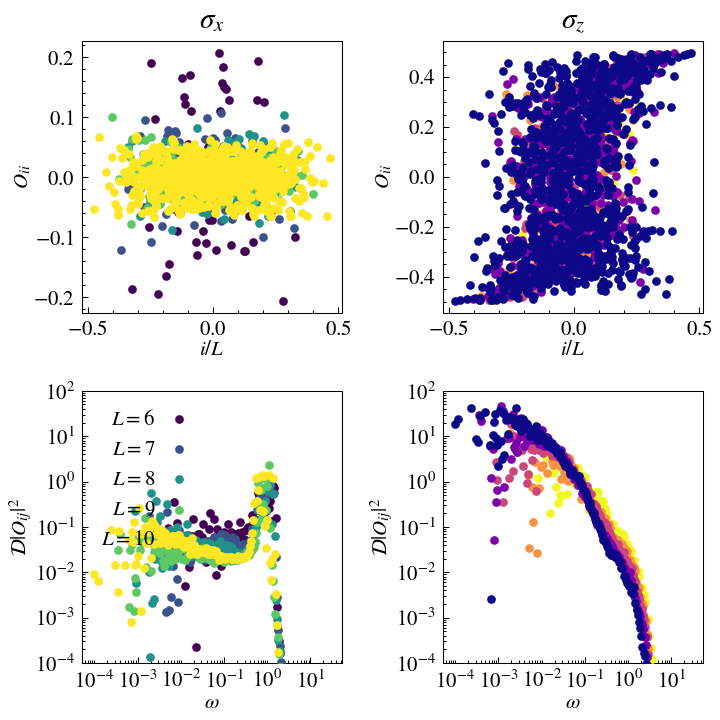

In [22]:
from general_python.physics.eigenlevels import gap_ratio
fig, ax     = Plotter.get_subplots(nrows=2, ncols=2, sizex=5, sizey=5, dpi=150)

# plot
for ii, ns in enumerate(energies.keys()):
    realizations = nrealizations[ii] if ii < len(nrealizations) else nrealizations[-1]
    nh          = 2**ns
    x           = energies[ns][0] / ns
    # x           = np.arange(nh)
    colors1, _, _= Plotter.get_colormap(nss, cmap='viridis')
    colors2, _, _= Plotter.get_colormap(nss, cmap='plasma_r')
    color1      = colors1(ns)
    color2      = colors2(ns)
    Plotter.scatter(ax[0], x, diagonals_x[ns][0], label=f'$L={ns}$', color=color1)
    Plotter.scatter(ax[1], x, diagonals_z[ns][0], label=f'$L={ns}$', color=color2)
    Plotter.set_ax_params(ax[0], xlabel='$i/L$', ylabel=r'$O_{ii}$', title=r'$\sigma_x$')
    Plotter.set_ax_params(ax[1], xlabel='$i/L$', ylabel=r'$O_{ii}$', title=r'$\sigma_z$')

    Plotter.scatter(ax[2], histograms_x[ns].bin_edges, histograms_x[ns].averages_av()*nh, label=f'$L={ns}$', color=color1)
    Plotter.scatter(ax[3], histograms_z[ns].bin_edges, histograms_z[ns].averages_av()*nh, label=f'$L={ns}$', color=color2)
    Plotter.set_ax_params(ax[2], xlabel=r'$\omega$', lim = {'y': (1e-4, 1e2)},
        ylabel=r'$\mathcal{D}|O_{ij}|^2$', scale={'x': 'log', 'y': 'log'})
    Plotter.set_ax_params(ax[3], xlabel=r'$\omega$', lim = {'y': (1e-4, 1e2)},
        ylabel=r'$\mathcal{D}|O_{ij}|^2$', scale={'x': 'log', 'y': 'log'})
    gap_ratios = [gap_ratio(energies[ns][i])['mean'] for i in range(realizations)]
    print(f"ns = {ns}, gap_ratio = {np.mean(gap_ratios)}")
    Plotter.set_legend(ax[2])
fig.tight_layout()

In [17]:

d_en = np.diff(energies[8])
d_en = d_en / np.mean(d_en)
gap_ratios = np.minimum(d_en[:-1], d_en[1:]) / np.maximum(d_en[:-1], d_en[1:])
print(np.mean(gap_ratios))


0.496256785068507


# Linear algebra

In [1]:
import general_python.algebra as algebra
a = algebra.AlgebraTests(backend='jax')
b = algebra.AlgebraTests(backend='numpy')

=== Backend Initialization ===
	NumPy Version: 1.26.4
	SciPy Version: 1.13.1
	JAX Version: Not Available
		Active Backend: jax
		JAX Available: True
		Default Random Key: [    0 12345]
	Active Backend Modules:
			Main Module: <module 'jax.numpy' from '/Users/makskliczkowski/miniconda3/lib/python3.12/site-packages/jax/numpy/__init__.py'>
			Random Module: <module 'jax.random' from '/Users/makskliczkowski/miniconda3/lib/python3.12/site-packages/jax/random.py'>
			SciPy Module: <module 'jax.scipy' from '/Users/makskliczkowski/miniconda3/lib/python3.12/site-packages/jax/scipy/__init__.py'>
=== End of Backend Info ===


/Users/makskliczkowski/Codes/QuantumEigenSolver/Python/QES/general_python/algebra/solvers/cg.py:1: SyntaxWarning: invalid escape sequence '\d'
  '''


SyntaxError: invalid syntax (cg.py, line 270)

## Standard tests

### Change the basis with a unitary matrix

In [ ]:
a.change_basis(verbose=True)
b.change_basis(verbose=True)

### Change the basis of a matrix with a unitary matrix

In [ ]:
a.change_basis_matrix(verbose=True)

### Outer product

In [ ]:
a.outer(verbose=True)
b.outer(verbose=True)

### Kronecker product

In [ ]:
a.kron(verbose=True)

## Linear solvers

### Test through examples

In [10]:
a = algebra.SolversTests(backend='numpy')
b = algebra.SolversTests(backend='jax')

In [11]:
a.solver_test()

[TEST 0] Starting solver test using cg


ValueError: Unknown solver type: must be one of DIRECT, BACKEND_SOLVER, SCIPY_DIRECT, SCIPY_CJ, CJ, SCIPY_MINRES, MINRES, MINRES_QLP

# Binary 

### Standard tests

In [1]:
from general_python.common import binary
NUM         = 42
tests       = binary.BinaryFunctionTests()

=== Backend Initialization ===
	NumPy Version: 1.26.4
	SciPy Version: 1.13.1
	JAX Version: Not Available
		Active Backend: jax
		JAX Available: True
		Default Random Key: [    0 12345]
	Active Backend Modules:
			Main Module: <module 'jax.numpy' from '/Users/makskliczkowski/miniconda3/lib/python3.12/site-packages/jax/numpy/__init__.py'>
			Random Module: <module 'jax.random' from '/Users/makskliczkowski/miniconda3/lib/python3.12/site-packages/jax/random.py'>
			SciPy Module: <module 'jax.scipy' from '/Users/makskliczkowski/miniconda3/lib/python3.12/site-packages/jax/scipy/__init__.py'>
=== End of Backend Info ===


23_03_2025_19-24_27 [INFO] Log file created: ./log/global.log
23_03_2025_19-24_27 [INFO] Log level set to: info
23_03_2025_19-24_27 [INFO] ########### Global logger initialized. ###########


In [2]:
import numpy as np
integer     = np.int64(255)
integer     = 255
ns          = 8
i           = 0
pos         = ns - 1 - i
checked     = binary.check_int(integer, pos)

binary.int2binstr(integer, ns), checked, (1 << pos), binary.int2binstr((1 << pos), ns), integer & (1 << pos)

('11111111', 1, 128, '10000000', 128)

In [ ]:
tests.run_tests(NUM, spin_value = binary._BACKENDREPR)

In [ ]:
tests.run_tests(NUM, spin_value = binary._BACKENDREPR, backend = 'np')

### Test JAX

In [ ]:
from algebra import get_backend
import time 
from jax import numpy as jnp, random as jnpr
import numpy as np, numpy.random as npr
from jax import jit

seed = 1701

# Test the speed of the matrix multiplication
key_np = npr.seed(seed)
key_jnp = jnpr.key(seed)
size = 5000

def matrix_mult_test_jax(size=size):
    random_mat  = jnpr.normal(key_jnp, (size, size))
    vec         = jnpr.normal(key_jnp, (size,))
    result      = random_mat @ vec
    print("Result of matrix-vector multiplication:\n", result)
    
def matrix_mult_test_numpy(size = size):
    random_mat  = npr.normal(size=(size, size))
    vec         = npr.normal(size=(size,))
    result      = random_mat @ vec
    print("Result of matrix-vector multiplication:\n", result)
    
@jit
def matrix_mult_test_jax_jit():
    random_mat  = jnpr.normal(key_jnp, (size, size))
    vec         = jnpr.normal(key_jnp, (size,))
    result      = random_mat @ vec
    print("Result of matrix-vector multiplication:\n", result)


#### Numpy

In [ ]:
start_time = time.time()
matrix_mult_test_numpy()
end_time = time.time()
print(f"Time taken: {end_time - start_time:.4f} seconds (numpy)")

#### Jax

In [ ]:
start_time = time.time()
matrix_mult_test_jax()
end_time = time.time()
print(f"Time taken: {end_time - start_time:.4f} seconds (jax)")

#### Jax jit

In [ ]:
start_time = time.time()
matrix_mult_test_jax_jit()
end_time = time.time()  
print(f"Time taken: {end_time - start_time:.4f} seconds (jax, jitted)")

# Lattice


In [ ]:
from lattices import Lattice, run_lattice_tests

# Run tests for different configurations
# run_lattice_tests(dim=1, lx=10, ly=1, lz=1, bc=lattices.LatticeBC.PBC, typek="square")
# run_lattice_tests(dim=2, lx=5, ly=3, lz=1, bc=lattices.LatticeBC.PBC, typek="square")
# run_lattice_tests(dim=2, lx=5, ly=5, lz=1, bc=lattices.LatticeBC.OBC, typek="square")
# run_lattice_tests(dim=3, lx=3, ly=3, lz=3, bc=lattices.LatticeBC.PBC, typek="square")
run_lattice_tests(dim=2, lx=3, ly=2, lz=1, bc=lattices.LatticeBC.PBC, typek="honeycomb")

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

a = 1
b = 1
c = 1

Lx = 4
Ly = 2
Ns = 2 * Lx * Ly

_a1 = np.array([np.sqrt(3) * a / 2.0, 3 * a / 2.0, 0])
_a2 = np.array([np.sqrt(3) * a / 2.0, -3 * a / 2.0, 0])
_a3 = np.array([0, 0, c])



coords      = []
move_vector = _a1 - np.array([0, a, 0])
for i in range(Ns):
    # get the unit cell on a square lattic
    x = (i // 2) % Lx
    y = ((i//2) // Lx) % Ly
    
    # from coorditates to position on the lattice
    xy = np.array([0., 0, 0]) if i % 2 == 0 else move_vector
    xy += x * (_a1 + _a2) + y * _a1
    xp, yp = xy[0], xy[1]
    print(xp, yp)
    plt.scatter(xp, yp, color='red' if i % 2 == 0 else 'blue', marker='o', s=100, facecolor='none')
    plt.text(xp + 0.1, yp + 0.1, i)
    
    print("Ns=", i, "-- (x,y)=", x, y)


plt.arrow(0, 0, _a1[0], _a1[1], head_width=0.1, head_length=0.1, fc='r', ec='r')
plt.arrow(0, 0, _a2[0], _a2[1], head_width=0.1, head_length=0.1, fc='b', ec='b')
# plt.arrow(0, 0, _a1[0] - _a2[0], _a1[1] - _a2[1], head_width=0.1, head_length=0.1, fc='g', ec='g')
# plt.arrow(0, 0, _a1[0] + _a2[0], _a1[1] + _a2[1], head_width=0.1, head_length=0.1, fc='y', ec='y')
# plt.arrow(0, 0, -_a1[0] + _a2[0], -_a1[1] + _a2[1], head_width=0.1, head_length=0.1, fc='m', ec='m')
# plt.arrow(0, 0, -_a1[0] - _a2[0], -_a1[1] - _a2[1], head_width=0.1, head_length=0.1, fc='c', ec='c')


# NQS

## Sampler

<!-- #### Code Overview

This code sets up a computational experiment by combining a simple neural network with Monte Carlo sampling. Below is a breakdown of the major steps and components.

---

##### 1. Module Imports

- **Monte Carlo Sampling:**  
  The module `Solver.MonteCarlo.sampler` is imported as `Sampling` to provide Monte Carlo sampling functionality.

- **Backend Utilities:**  
  `get_backend` from `general_python.algebra.utils` is used to select a computational backend (e.g., NumPy) and obtain associated random number generators.

- **Neural Network Implementation:**  
  `SimpleNet` from `general_python.ml.net_impl.net_simple` is imported as a basic neural network class used for experimentation.

- **NumPy:**  
  Imported as `np` to support numerical operations.

---

##### 2. Backend Setup

- **Selection & Seed:**
  - **Backend:** Set to `"np"` (NumPy).
  - **Seed:** A seed of `1701` is specified to ensure reproducibility.

- **Obtaining Backend Modules:**  
  The function `get_backend` is called with parameters to ensure randomness (and optionally SciPy support). Its output is unpacked into:
  - `backend_np`: The NumPy backend.
  - `(rng, rng_k)`: Random number generators.
  - `backend_sp`: The SciPy backend (if available).

---

##### 3. Neural Network Configuration

- **State Shape:**  
  The input to the network is defined as a 10-dimensional vector (`st_shape = (10,)`).

- **Activation Functions:**  
  Two activation functions are specified: `'relu'` and `'sigmoid'`.

- **Network Initialization:**  
  A `SimpleNet` instance is created with:
  - **Input Shape:** `(10,)`
  - **Output Shape:** `(1,)`
  - **Layers:** A tuple `(5,)` indicating the network has 5 layers.
  - **Backend:** Specified as `'np'`.
  - **Data Type:** `'complex128'`, enabling complex-valued computations.

---

##### 4. Monte Carlo Sampler Configuration

- **Sampler Initialization:**  
  An instance of `Sampling.MCSampler` is created to perform Monte Carlo sampling on the neural network.

- **Key Parameters:**
  - **Network (`net`):** The previously defined `SimpleNet` instance.
  - **Shape:** The state shape `(10,)`.
  - **Random Number Generators:** `rng` and `rng_k` ensure randomness in the sampling process.
  - **Chains & Samples:** Configured to run 10 chains with 5 samples each.
  - **Sweep Steps & Thermalization:** Set to 10 steps each, controlling the progression and stabilization of the Monte Carlo simulation.
  - **Backend:** Uses the specified NumPy backend.

---

##### 5. Final Outcome

The final product is the `sampler` object, which encapsulates both the neural network and the Monte Carlo sampling parameters. This setup is ready to run experiments, allowing exploration of the network's state space through stochastic sampling.

---

**Summary:**  
This code initializes a complex-valued neural network and configures a Monte Carlo sampler to perform experiments. It ensures reproducibility with a fixed seed and leverages a specified backend (NumPy) along with associated random number generators, thereby preparing the system for robust computational experiments. -->


In [1]:
import Solver.MonteCarlo.sampler as Sampling
from general_python.algebra.utils import get_backend
from general_python.ml.net_impl.net_simple import SimpleNet
import numpy as np

# get random backend
backend                                 = 'jax'
seed                                    = 1701
be_modules                              = get_backend(backend, random=True, seed=seed, scipy=True)
backend_np, (rng, rng_k), backend_sp    = be_modules if isinstance(be_modules, tuple) else (be_modules, (None, None), None)

ns                                      = 10
st_shape                                = (ns, )
activations                             = ('relu', 'sigmoid')
net                                     = SimpleNet(act_fun =   activations, 
                                            input_shape     =   st_shape, 
                                            output_shape    =   (1, ),
                                            layers          =   (5, ),
                                            backend=backend, dtype='complex128',)
            # [random.random() + 1j * random.random() for _ in range(x.shape[0])])
# a simple callable network function

sampler = Sampling.MCSampler(
    net         = net,
    shape       = st_shape,
    rng         = rng,
    rng_k       = rng_k,
    numchains   = 10,
    numsamples  = 5,
    sweep_steps = 10,
    backend     = backend,
    therm_steps = 10,
)

sampler

=== Backend Initialization ===
	NumPy Version: 1.26.4
	SciPy Version: 1.13.1
	JAX Version: Not Available
		Active Backend: jax
		JAX Available: True
		Default Random Key: [    0 12345]
	Active Backend Modules:
			Main Module: <module 'jax.numpy' from '/Users/makskliczkowski/miniconda3/lib/python3.12/site-packages/jax/numpy/__init__.py'>
			Random Module: <module 'jax.random' from '/Users/makskliczkowski/miniconda3/lib/python3.12/site-packages/jax/random.py'>
			SciPy Module: <module 'jax.scipy' from '/Users/makskliczkowski/miniconda3/lib/python3.12/site-packages/jax/scipy/__init__.py'>
=== End of Backend Info ===


MCSampler(shape=(10,), mu=2.0, beta=1.0, therm_steps=10, sweep_steps=10, numsamples=5, numchains=10, backend=jax)

In [4]:
# check how the sampler performs
(states, logprobas), (configs, configs_ansatze), probabilities = sampler.sample()

In [5]:
# final states after sampling, ansatze after sampling
states.shape, logprobas.shape

((10, 10), (10,))

In [6]:
configs.shape, configs_ansatze.shape, probabilities.shape

((50, 10), (50, 1), (50, 1))

### Flow

#### Standard

In [7]:
from general_python.common.plot import MatrixPrinter

print("Detailed Flow of the Configurations:\n")
print(f"  Total number of configurations: {len(configs)}")
print(f"  Total number of states: {len(states)}")
print(f"  Total number of probabilities: {len(probabilities)}\n")

for i in range(len(configs[:3])):
    print(f"--- Configuration flow {i} ---")
    print("     Configuration \\(\\mathbf{S}_{" + f"{i}" + "}\\):")
    MatrixPrinter.print_vector(configs[i])
    
    print("    Ansatz \\(f(\\mathbf{S}_{" + f"{i}" + "})\\):")
    MatrixPrinter.print_vector(configs_ansatze[i].T)
    
    print("    Probability \\(P(\\mathbf{S}_{" + f"{i}" + "})\\):")
    MatrixPrinter.print_vector(probabilities[i].T)
    print("\n" + "-" * 50 + "\n")


Detailed Flow of the Configurations:

  Total number of configurations: 50
  Total number of states: 10
  Total number of probabilities: 50

--- Configuration flow 0 ---
     Configuration \(\mathbf{S}_{0}\):


Matrix([
[ 0.5],
[-0.5],
[ 0.5],
[-0.5],
[-0.5],
[-0.5],
[ 0.5],
[-0.5],
[-0.5],
[ 0.5]])

    Ansatz \(f(\mathbf{S}_{0})\):


Matrix([[1.22454006754276 - 1.09960434372059*I]])

    Probability \(P(\mathbf{S}_{0})\):


Matrix([[1.0]])


--------------------------------------------------

--- Configuration flow 1 ---
     Configuration \(\mathbf{S}_{1}\):


Matrix([
[-0.5],
[-0.5],
[ 0.5],
[ 0.5],
[ 0.5],
[ 0.5],
[ 0.5],
[ 0.5],
[ 0.5],
[-0.5]])

    Ansatz \(f(\mathbf{S}_{1})\):


Matrix([[0.694983664887653 + 0.177165839037739*I]])

    Probability \(P(\mathbf{S}_{1})\):


Matrix([[1.0]])


--------------------------------------------------

--- Configuration flow 2 ---
     Configuration \(\mathbf{S}_{2}\):


Matrix([
[ 0.5],
[-0.5],
[ 0.5],
[-0.5],
[ 0.5],
[-0.5],
[-0.5],
[ 0.5],
[ 0.5],
[-0.5]])

    Ansatz \(f(\mathbf{S}_{2})\):


Matrix([[0.935409115994354 + 0.0499749979989821*I]])

    Probability \(P(\mathbf{S}_{2})\):


Matrix([[1.0]])


--------------------------------------------------



#### Flattened

In [21]:
from general_python.common.plot import MatrixPrinter

# -----------------------------------------------------------------
# Flatten the configurations and ansatz arrays with a clearer mathematical description
#
# Let 𝒞 ∈ ℝ^(N×d) represent the configuration matrix, where:
#   N = number of samples (configurations)
#   d = st_shape[0] (the dimension of each configuration)
#
# Similarly, for the ansatz values f(𝒞) (one per configuration), we flatten the array.
# -----------------------------------------------------------------

# Reshape configurations to a 2D array: each row is one configuration vector.
configs_flat = configs.reshape(-1, st_shape[0])
print("Shape of flattened configurations (𝒞):", configs_flat.shape)

# Flatten the ansatze: each configuration has a single ansatz value.
configs_ansatze_flat = configs_ansatze.reshape(-1)
print("Shape of flattened ansatze (f(𝒞)):", configs_ansatze_flat.shape)

print("\nDetailed flow of the configurations:")
print("Number of configurations:", len(configs_flat))
print()

# -----------------------------------------------------------------
# For the first 5 configurations, print:
#   - The configuration vector 𝒞ᵢ
#   - The ansatz from the network f(𝒞ᵢ)
#   - A verification whether f(𝒞ᵢ) matches the ansatz given by the sampler.
# -----------------------------------------------------------------
for i in range(len(configs_flat[:5])):
    print(f"--- Configuration {i} ---")
    
    print("\tConfiguration (𝒞):")
    print("\t", configs_flat[i])
    # MatrixPrinter.print_vector(configs_flat[i]
    
    print("'\tAnsatz from sampler (f(𝒞)):")
    # Compute the ansatz from the network using the configuration.
    print("\t", configs_ansatze_flat[i])
    ansatz_net = net(configs_flat[i])
    print("\tAnsatz from the network:")
    print("\t", ansatz_net)
    
    # Verify if the network's ansatz equals the sampler's ansatz.
    is_same = np.allclose(ansatz_net, configs_ansatze_flat[i])
    print("\tVerification (f(𝒞) from network ?= sampler's ansatz):", is_same)
    
    print("\n-------------------------\n")


Shape of flattened configurations (𝒞): (50, 10)
Shape of flattened ansatze (f(𝒞)): (50,)

Detailed flow of the configurations:
Number of configurations: 50

--- Configuration 0 ---
	Configuration (𝒞):
	 [ 0.5 -0.5 -0.5 -0.5  0.5 -0.5 -0.5 -0.5 -0.5  0.5]
'	Ansatz from sampler (f(𝒞)):
	 (0.9988898051454899+0.0012479485129088428j)


KeyError: "Parameters must contain 'layers' key."

## Solver class

Below, we:

1. Create a simple network for the NQS ansatz
2. Create a sampler
3. Create a dummy Hamiltonian

In [1]:
import NQS.nqs as nqsmodule
import Solver.MonteCarlo.sampler as Sampling
from Algebra.Model.dummy import DummyHamiltonian
from general_python.algebra.utils import get_backend
from general_python.ml.net_impl.net_simple import SimpleNet

import numpy as np

# get random backend
# backend             = 'np'
backend             = 'jax'
seed                = 1701
dtypex              = complex
be_modules          = get_backend(backend, random=True, seed=seed, scipy=True)
backend_np, (rng, rng_k), backend_sp = be_modules if isinstance(be_modules, tuple) else (be_modules, (None, None), None)

# get the network
ns                  = 20
st_shape            = (ns, )
activations         = ('relu', 'sigmoid')
net                 = SimpleNet(act_fun =   activations, 
                        input_shape     =   st_shape, 
                        output_shape    =   (1, ),
                        layers          =   (5, ),
                        backend         =   backend_np,
                        dtype           =   dtypex)

# get the sampler
sampler             = Sampling.MCSampler(
                            net         = net,
                            shape       = st_shape,
                            rng         = rng,
                            rng_k       = rng_k,
                            numchains   = 10,
                            numsamples  = 5,
                            sweep_steps = 30,
                            backend     = backend_np,
                            therm_steps = 10,
                        )

# get the Hamiltonian
# ham_dtype           = complex
ham_dtype           = float
par                 = 0.5 + 1j * 0.5 if ham_dtype == complex else 0.5
ham                 = DummyHamiltonian(hilbert_space=None, ns = ns, backend = backend, dtype = ham_dtype)
batch_size          = 1

nqs                 = nqsmodule.NQS(
                            net         = net,
                            sampler     = sampler,
                            hamiltonian = ham,
                            lower_betas = None,
                            lower_states= None,
                            seed        = seed,
                            beta        = 1.0,
                            shape       = st_shape,
                            backend     = backend,
                            nthread     = 1,
                            batch_size  = batch_size)

=== Backend Initialization ===
	NumPy Version: 1.26.4
	SciPy Version: 1.13.1
	JAX Version: Not Available
		Active Backend: jax
		JAX Available: True
		Default Random Key: [    0 12345]
	Active Backend Modules:
			Main Module: <module 'jax.numpy' from '/home/klimak/libraries/anaconda3/lib/python3.11/site-packages/jax/numpy/__init__.py'>
			Random Module: <module 'jax.random' from '/home/klimak/libraries/anaconda3/lib/python3.11/site-packages/jax/random.py'>
			SciPy Module: <module 'jax.scipy' from '/home/klimak/libraries/anaconda3/lib/python3.11/site-packages/jax/scipy/__init__.py'>
=== End of Backend Info ===


08_04_2025_19-25_12 [INFO] Log file created: ./log/global.log
08_04_2025_19-25_12 [INFO] Log level set to: info
08_04_2025_19-25_12 [INFO] ########### Global logger initialized. ###########
08_04_2025_19-25_12 [INFO] 	->[Hamiltonian] Using spin operators
08_04_2025_19-25_12 [INFO] 		->[Hamiltonian] Adding modifying operator Operator(Sx/0-1, eigval=1.0, type=Other) at site 0 (global) with multiplier 0.0
08_04_2025_19-25_12 [INFO] 		->[Hamiltonian] Adding non-modifying operator Operator(Sz/0, eigval=1.0, type=Other) at site 0 (global) with multiplier 0.0
08_04_2025_19-25_12 [INFO] 		->[Hamiltonian] Adding modifying operator Operator(Sx/1-2, eigval=1.0, type=Other) at site 1 (global) with multiplier 1.0
08_04_2025_19-25_12 [INFO] 		->[Hamiltonian] Adding non-modifying operator Operator(Sz/1, eigval=1.0, type=Other) at site 1 (global) with multiplier 0.5
08_04_2025_19-25_12 [INFO] 		->[Hamiltonian] Adding modifying operator Operator(Sx/2-3, eigval=1.0, type=Other) at site 2 (global) with m

In [4]:
sampler

MCSampler(shape=(20,), mu=0, beta=1.0, therm_steps=10, sweep_steps=30, numsamples=5, numchains=10, backend=jax)

In [14]:
(states, logprobas), (configs, configs_ansatze), probabilities = nqs.sample(num_samples=5, num_chains=5)
configs.shape

(25, 20)

In [23]:
from flax.training.train_state import TrainState
import matplotlib.pyplot as plt
import optax

# try to train the network

n_epo       = 150
batch_size  = 10
history     = []
sr          = nqs.sr
# Initialize the optimizer
# lr          = optax.linear_schedule(init_value=0.001, end_value=0.0001, transition_steps=1000)
# optimizer   = optax.adam(learning_rate=lr)
lr          = 6e-3
# Create a TrainState to manage the model parameters and optimizer state
# train_state = TrainState.create(apply_fn=net.apply, params=net.get_params(), tx=optimizer)

for i in range(n_epo):
    print(f"Epoch {i + 1}/{n_epo}")
    
    # collect the samples
    (states, logprobas), (configs, configs_ansatze), probabilities = nqs.sample()
    print(f"  Number of configurations: {configs.shape}")
    print(f"  Configs and ansatze: {configs_ansatze.shape}")
    print(f"  Number of states: {states.shape}")
    print(f"  Number of probabilities: {probabilities.shape}\n")
    
    # collect the energies
    (configs, ansatze), probabilities, (v, means, stds) = nqs.evaluate_fun(
        states_and_psi  = (configs, configs_ansatze),
        probabilities   = probabilities,
        functions       = None,     # means that we evaluate energy
        batch_size      = batch_size
    )
    # print(f"  Energies: {v.shape}")
    # print(f"  Mean energy: {means}, std: {stds}")
    # print(f"  Configurations: {configs.shape}")
    
    # get the gradients
    # grad = nqs.gradient(states=configs, batch_size=batch_size)
    
    # try to calculate the stochastic reconfiguration
    # sr.set_values(loss=v, derivatives=grad, mean_loss=means, mean_deriv=None, calculate_s=True, use_minsr=False)

    # f = sr.forces
    # s = sr.covariance_matrix
    # print(f"  Forces: {f.shape}")
    # if s is not None:
        # print(f"  Covariance matrix: {s.shape}")
    
    # try to calculate the gradient through the stochastic reconfiguration
    # s_inv   = jnp.linalg.pinv(s, rtol = 1e-3)
    # print(f"  Inverse covariance matrix: {s_inv.shape}")
    # df      = lr * jnp.dot(s_inv, f)
    # df = jnp.linalg.solve(s, f)
    # print(f"  Gradient through the stochastic reconfiguration: {df.shape}")
    
    # Update the network parameters using TrainState
    
    # new_params      = train_state.apply_gradients(grads={"params":df})
    # nqs.update_parameters(df)
    # updates, new_opt_state  = train_state.tx.update(df, train_state.opt_state, train_state.params)
    # new_params              = optax.apply_updates(train_state.params, updates)
    # train_state             = train_state.replace(params=new_params, opt_state=new_opt_state)
    
    # history.append(means)
    

plt.plot(history)

# Number of configurations: (25, 10)
# Configs and ansatze: (25, 1)
# Number of states: (5, 10)
# Number of probabilities: (25, 1)

Epoch 1/150
  Number of configurations: (50, 20)
  Configs and ansatze: (50, 1)
  Number of states: (10, 20)
  Number of probabilities: (50, 1)



KeyboardInterrupt: 

## Test flax networks

In [1]:
import NQS.nqs as nqsmodule
import Solver.MonteCarlo.sampler as Sampling
from general_python.algebra.utils import get_backend
from general_python.ml.net_impl.networks.net_rbm import RBM

import numpy as np
import jax.numpy as jnp

#! Hamiltonian
from Algebra.Model.Interacting.Spin.transverse_ising import TransverseFieldIsing
from general_python.lattices.square import SquareLattice
from general_python.lattices.lattice import LatticeBC

# get random backend
backend             = 'jax'
seed                = 1234
dtypex              = jnp.complex128
be_modules          = get_backend(backend, random=True, seed=seed, scipy=True)
backend_np, (rng, rng_k), backend_sp = be_modules if isinstance(be_modules, tuple) else (be_modules, (None, None), None)

# get the network
ns                  = 2
st_shape            = (ns, )
net                 =   RBM(
    input_shape     = st_shape, 
    n_hidden        = 3,
    dtype           = dtypex,
    seed            = seed,
    visible_bias    = True,
    bias            = True
)
sampler             =   Sampling.MCSampler(
    net             = net,
    shape           = st_shape,
    rng             = rng,
    rng_k           = rng_k,
    numchains       = 10,
    numsamples      = 100,
    sweep_steps     = ns,
    backend         = backend_np,
    therm_steps     = 25,
    mu              = 2.0,
    seed            = seed
)

# get the Hamiltonian
ham_dtype           = jnp.float64
lattice             =   SquareLattice(
    dim             = 1, 
    lx              = ns, 
    ly              = 1, 
    lz              = 1, 
    bc              = LatticeBC.PBC
)

j                   = -1.0   
g                   = -0.5   
h                   = 0.5
ham                 =   TransverseFieldIsing(
    lattice         = lattice,
    hilbert_space   = None,
    j               = j,
    hz              = h,
    hx              = g,
    dtype           = ham_dtype,
    backend         = backend_np
)

nqs                 =   nqsmodule.NQS(
    net             = net,
    sampler         = sampler,
    hamiltonian     = ham,
    lower_betas     = None,
    lower_states    = None,
    seed            = seed,
    beta            = 1.0,
    mu              = sampler.get_mu(),
    shape           = st_shape,
    backend         = backend_np,
    nthread         = 1,
    batch_size      = 1
)

INFO:general_python.algebra.utils:63: JAX backend available and successfully imported
INFO:general_python.algebra.utils:63: 	JAX 64-bit precision enabled.
INFO:general_python.algebra.utils:262: Setting JAX as the active backend.
INFO:general_python.algebra.utils:63: **************************************************
INFO:general_python.algebra.utils:63: Backend Configuration:
INFO:general_python.algebra.utils:63: 		NumPy Version: 1.26.4
INFO:general_python.algebra.utils:63: 		SciPy Version: 1.13.1
INFO:general_python.algebra.utils:63: 		JAX Version: 0.5.3
INFO:general_python.algebra.utils:63: 		Active Backend: jax
INFO:general_python.algebra.utils:63: 			JAX Available: True
INFO:general_python.algebra.utils:63: 			Default Seed: 42
INFO:general_python.algebra.utils:63: 		JAX Backend Details:
INFO:general_python.algebra.utils:63: 				Main Module: jax.numpy
INFO:general_python.algebra.utils:63: 				Random Module: jax.random (+ PRNGKey)
INFO:general_python.algebra.utils:63: 				SciPy Modul

### Local energy

In [3]:
import general_python.common.binary as binary

int_state       = np.random.randint(0, 2**ham.ns)
print(f"Integer state: {int_state}")
loc_energy_int  = []
for i in range(ham.ns):
    loc_energy_int.append(ham.loc_energy_int(int_state, i))
loc_states_int  = [i[0] for i in loc_energy_int]
loc_energy_int  = [i[1] for i in loc_energy_int]
print(loc_states_int)
# flatten the list
loc_energy_int  = [item for sublist in loc_energy_int for item in sublist]
loc_states_int  = [item for sublist in loc_states_int for item in sublist]
loc_energy_int_l= [loc_energy_int[i] for i in range(len(loc_energy_int)) if loc_states_int[i] == int_state]
loc_states_int_l= [loc_states_int[i] for i in range(len(loc_energy_int)) if loc_states_int[i] == int_state]
loc_energy_int  = [loc_energy_int[i] for i in range(len(loc_states_int)) if loc_states_int[i] != int_state]
loc_states_int  = [loc_states_int[i] for i in range(len(loc_states_int)) if loc_states_int[i] != int_state]
loc_energy_int  = [np.sum(loc_energy_int_l)] + loc_energy_int 
loc_states_int  = [int_state] + loc_states_int

jax_state       = binary.int2base(n = int_state, size = ham.ns, backend = 'np')
jax_state       = jnp.array(jax_state, dtype=jnp.float64)
loc_energy_jax  = ham.loc_energy_arr_jax(jax_state)
loc_states_jax  = loc_energy_jax[0]
loc_energy_jax  = loc_energy_jax[1]

print(len(loc_energy_int), len(loc_energy_jax))
print(len(loc_states_int), len(loc_states_jax))
for i in range(len(loc_energy_int)):
    print("i=", i)
    print(f"\tInt state: {loc_states_int[i]}, Energy: {loc_energy_int[i]}")
    print(f"\tInt state: {binary.base2int(loc_states_jax[i])}, Jax state: {loc_states_jax[i]}, Energy: {loc_energy_jax[i]}")


Integer state: 2
[array([2, 0]), array([2, 3])]
3 3
3 3
i= 0
	Int state: 2, Energy: -0.5
	Int state: 2, Jax state: [ 0.5 -0.5], Energy: -0.5
i= 1
	Int state: 0, Energy: 0.25
	Int state: 0, Jax state: [-0.5 -0.5], Energy: 0.25
i= 2
	Int state: 3, Energy: 0.25
	Int state: 3, Jax state: [0.5 0.5], Energy: 0.25


In [5]:
# gradient
jax_state_reshape = jax_state.reshape(1, -1)
# jax_state_reshape = jnp.array([jax_state, jax_state], dtype=jnp.float64)
print(jax_state_reshape.shape)

# get the gradient - numerical
grad_num, shapes, sizes, is_cpx = nqs.gradient(states=jax_state_reshape, batch_size=1, params=net.get_params())
grad_num                = nqs.transform_flat_params(grad_num[0], shapes, sizes, is_cpx)
# print("Gradient - numerical:", grad_num)
# get the gradient - analytical
grad_anal_f, params = net.get_gradient()
grad_anal           = grad_anal_f(net.get_params(), jax_state_reshape)
# print("Gradient - analytical:", grad_anal)

# compare
for g, g_ in zip(grad_num, grad_anal):
    print(f"\nGradient Group: {g}")
    print("-" * 50)
    
    elem_num = grad_num[g]
    elem_anal = grad_anal[g_]
    
    if 'bias' in elem_num:
        bias_num = elem_num['bias']
        bias_anal = elem_anal['bias'][0]
        print("\tBias - Numerical:")
        print(f"\t{bias_num}")
        print(f"\tShape: {bias_num.shape}, dtype: {bias_num.dtype}")
        print("\tBias - Analytical:")
        print(f"\t{bias_anal}")
        print(f"\tShape: {bias_anal.shape}, dtype: {bias_anal.dtype}")
        bias_diff = bias_num - bias_anal
        print("\tBias Difference:")
        print(f"\t{bias_diff}")
    else:
        print(f"Numerical: {elem_num}")
    
    if 'kernel' in elem_num:
        kernel_num = elem_num['kernel']
        kernel_anal = elem_anal['kernel'][0]
        print("\tKernel - Numerical:")
        print(f"\t{kernel_num}")
        print(f"\tShape: {kernel_num.shape}, dtype: {kernel_num.dtype}")
        print("\tKernel - Analytical:")
        print(f"\t{kernel_anal}")
        print(f"\tShape: {kernel_anal.shape}, dtype: {kernel_anal.dtype}")
        kernel_diff = kernel_num - kernel_anal
        print("\tKernel Difference:")
        print(f"\t{kernel_diff}")
    else:
        print(f"Analytical: {elem_anal}")
        print(f"Numerical: {elem_num}")
        print(f"Difference: {elem_anal - elem_num}")
    
    # print("\nSummary for Group:")
    # print(f"\tNumerical: {elem_num}")
    # print(f"\tAnalytical: {elem_anal}")
    # print("-" * 50)


(1, 2)

Gradient Group: VisibleToHidden
--------------------------------------------------
	Bias - Numerical:
	[ 0.60353424+0.32537229j  0.47803027-0.48559712j -0.52198043+1.17321339j]
	Shape: (3,), dtype: complex128
	Bias - Analytical:
	[ 0.60353424+0.32537229j  0.47803027-0.48559712j -0.52198043+1.17321339j]
	Shape: (3,), dtype: complex128
	Bias Difference:
	[ 0.00000000e+00+5.55111512e-17j -5.55111512e-17+1.11022302e-16j
 -2.22044605e-16+4.44089210e-16j]
	Kernel - Numerical:
	[[ 0.30176712+0.16268614j  0.23901514-0.24279856j -0.26099021+0.5866067j ]
 [-0.30176712-0.16268614j -0.23901514+0.24279856j  0.26099021-0.5866067j ]]
	Shape: (2, 3), dtype: complex128
	Kernel - Analytical:
	[[ 0.30176712+0.16268614j  0.23901514-0.24279856j -0.26099021+0.5866067j ]
 [-0.30176712-0.16268614j -0.23901514+0.24279856j  0.26099021-0.5866067j ]]
	Shape: (2, 3), dtype: complex128
	Kernel Difference:
	[[ 0.00000000e+00+2.77555756e-17j -2.77555756e-17+5.55111512e-17j
  -1.11022302e-16+2.22044605e-16j]
 

In [6]:
grad_anal

{'VisibleToHidden': {'bias': Array([[ 0.60353424+0.32537229j,  0.47803027-0.48559712j,
          -0.52198043+1.17321339j]], dtype=complex128),
  'kernel': Array([[[ 0.30176712+0.16268614j,  0.23901514-0.24279856j,
           -0.26099021+0.5866067j ],
          [-0.30176712-0.16268614j, -0.23901514+0.24279856j,
            0.26099021-0.5866067j ]]], dtype=complex128)},
 'visible_bias': Array([[ 0.5+0.j, -0.5+0.j]], dtype=complex128)}

### Sampler

In [9]:
sampler

MCSampler(shape=(10,), mu=2.0, beta=1.0, therm_steps=100, sweep_steps=20, numsamples=50, numchains=10, backend=jax)

In [6]:
import general_python.common.binary as binary

def do():
    (states, logprobas), (configs, configs_ansatze), probabilities = sampler.sample(num_samples=5, num_chains=5)
    for config in configs[:2]:
        print(config)
        print(binary.base2int(config))
        print()
%timeit -r 5 -n 5 do()
(states, logprobas), (configs, configs_ansatze), probabilities = sampler.sample(num_samples=5, num_chains=5)

[-0.5  0.5  0.5  0.5  0.5 -0.5 -0.5  0.5]
121

[ 0.5 -0.5  0.5  0.5  0.5 -0.5 -0.5  0.5]
185

[ 0.5  0.5 -0.5 -0.5 -0.5 -0.5  0.5  0.5]
195

[ 0.5 -0.5  0.5  0.5  0.5 -0.5 -0.5  0.5]
185

[-0.5  0.5  0.5  0.5  0.5 -0.5 -0.5  0.5]
121

[ 0.5  0.5 -0.5  0.5  0.5 -0.5 -0.5  0.5]
217

[-0.5 -0.5  0.5  0.5  0.5 -0.5 -0.5  0.5]
57

[-0.5 -0.5  0.5  0.5  0.5 -0.5 -0.5  0.5]
57

[ 0.5  0.5 -0.5  0.5 -0.5 -0.5  0.5 -0.5]
210

[ 0.5 -0.5 -0.5  0.5 -0.5 -0.5  0.5 -0.5]
146

[ 0.5 -0.5 -0.5 -0.5 -0.5 -0.5  0.5  0.5]
131

[-0.5  0.5 -0.5  0.5  0.5 -0.5 -0.5  0.5]
89

[ 0.5  0.5 -0.5  0.5 -0.5 -0.5 -0.5  0.5]
209

[ 0.5 -0.5  0.5 -0.5 -0.5 -0.5  0.5  0.5]
163

[ 0.5  0.5 -0.5 -0.5 -0.5 -0.5  0.5  0.5]
195

[ 0.5 -0.5 -0.5 -0.5 -0.5  0.5  0.5 -0.5]
134

[ 0.5 -0.5  0.5  0.5  0.5 -0.5 -0.5  0.5]
185

[ 0.5 -0.5  0.5 -0.5 -0.5 -0.5  0.5 -0.5]
162

[-0.5 -0.5  0.5  0.5  0.5 -0.5 -0.5  0.5]
57

[ 0.5  0.5 -0.5 -0.5 -0.5 -0.5  0.5  0.5]
195

[-0.5  0.5 -0.5 -0.5 -0.5  0.5  0.5 -0.5]
70

[-0.5  0.5  0.5  0

In [14]:
configs_ansatze

Array([[18.6798834 -1.86558764j],
       [15.69267856+2.21329127j],
       [14.17244331+0.12500862j],
       [13.95725219+1.80972691j],
       [15.69267856+2.21329127j],
       [18.6798834 -1.86558764j],
       [15.61151841+4.93667777j],
       [14.07529593-1.64847355j],
       [15.61151841+4.93667777j],
       [15.61151841+4.93667777j],
       [18.6798834 -1.86558764j],
       [15.61151841+4.93667777j],
       [13.95725219+1.80972691j],
       [15.69267856+2.21329127j],
       [15.61151841+4.93667777j],
       [18.6798834 -1.86558764j],
       [15.61151841+4.93667777j],
       [15.61151841+4.93667777j],
       [15.69267856+2.21329127j],
       [15.61151841+4.93667777j],
       [18.6798834 -1.86558764j],
       [15.69267856+2.21329127j],
       [15.69267856+2.21329127j],
       [15.69267856+2.21329127j],
       [15.61151841+4.93667777j]], dtype=complex128)

In [39]:
net.apply(net.get_params(), configs)

Array([18.6798834 -1.86558764j, 15.69267856+2.21329127j,
       14.17244331+0.12500862j, 13.95725219+1.80972691j,
       15.69267856+2.21329127j, 18.6798834 -1.86558764j,
       15.61151841+4.93667777j, 14.07529593-1.64847355j,
       15.61151841+4.93667777j, 15.61151841+4.93667777j,
       18.6798834 -1.86558764j, 15.61151841+4.93667777j,
       13.95725219+1.80972691j, 15.69267856+2.21329127j,
       15.61151841+4.93667777j, 18.6798834 -1.86558764j,
       15.61151841+4.93667777j, 15.61151841+4.93667777j,
       15.69267856+2.21329127j, 15.61151841+4.93667777j,
       18.6798834 -1.86558764j, 15.69267856+2.21329127j,
       15.69267856+2.21329127j, 15.69267856+2.21329127j,
       15.61151841+4.93667777j], dtype=complex128)

In [41]:
ham.loc_energy_arr_jax(configs[0])

(Array([[ 0.5, -0.5, -0.5, -0.5, -0.5, -0.5,  0.5, -0.5],
        [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5,  0.5, -0.5],
        [ 0.5,  0.5, -0.5, -0.5, -0.5, -0.5,  0.5, -0.5],
        [ 0.5, -0.5,  0.5, -0.5, -0.5, -0.5,  0.5, -0.5],
        [ 0.5, -0.5, -0.5,  0.5, -0.5, -0.5,  0.5, -0.5],
        [ 0.5, -0.5, -0.5, -0.5,  0.5, -0.5,  0.5, -0.5],
        [ 0.5, -0.5, -0.5, -0.5, -0.5,  0.5,  0.5, -0.5],
        [ 0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5],
        [ 0.5, -0.5, -0.5, -0.5, -0.5, -0.5,  0.5,  0.5]], dtype=float64),
 Array([1.  , 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25], dtype=float64))

In [11]:
(configs, ansatze), probabilities, (v, means, stds) = nqs.evaluate_fun(
    states_and_psi  = (configs, configs_ansatze),
    probabilities   = probabilities,
    functions       = None,     # means that we evaluate energy
    batch_size      = batch_size
)
v

Array([ 0.91516313+0.57772445j, -0.31803016+0.45393218j,
        0.35917972-0.2530573j , -1.49635606+0.51852711j,
       -0.65504546-0.24356749j, -0.68269731+0.4118519j ,
       -0.65504546-0.24356749j, -1.80831796-0.79272133j,
        0.10996583-0.29216746j, -1.87587348+0.25302836j,
       -0.14254834-0.70061433j, -1.18537728+1.48183959j,
       -0.49960058-0.46294056j, -1.5545093 +0.13250797j,
       -2.45635418+0.54524098j, -0.44892884-0.42942401j,
       -1.83103569+1.07336949j,  0.48243437-1.17153687j,
       -1.5545093 +0.13250797j, -1.23676435-0.54330968j,
       -1.47651997+0.39083993j, -0.17814042+0.06153394j,
        0.35917972-0.2530573j , -1.5545093 +0.13250797j,
       -1.5545093 +0.13250797j], dtype=complex128)

In [4]:
p = nqs.get_params().copy()
p

{'visible_bias': Array([ 0.00713442-2.02962283e-03j,  0.00028363-9.20228508e-03j,
         0.00876348+3.92257908e-03j, -0.00241103+5.85689104e-03j,
        -0.00406314-7.13418396e-06j, -0.00784153+2.16923983e-03j,
         0.0035687 -3.32697455e-03j, -0.00345455+3.40241174e-03j,
        -0.00643833+2.65361196e-04j,  0.00448199+3.04643919e-03j],      dtype=complex128),
 'VisibleToHidden': {'kernel': Array([[ 0.27752265+0.216207j  , -0.54926973-0.27460565j,
           0.37155939-0.52039374j,  0.25646177-0.17849029j,
           0.46650467+0.01475198j,  0.01585693+0.13034685j,
           0.05628175-0.12330804j,  0.57147166-0.15333435j,
           0.48952495+0.45640557j, -0.86687389+0.12207581j,
           0.78358692+0.00771538j, -0.2618848 -0.0422873j ,
          -0.15197307+0.24755427j, -0.07850285-0.0944278j ,
           0.536433  +0.65526505j,  0.27455783+0.37228609j,
           0.27642373+0.34833611j,  0.19330493+0.34996769j,
           0.22180166+0.29540316j,  0.72406886+0.08177003j],

In [5]:
params = net.get_params().copy()
params['visible_bias'] = jnp.array([0.1] * ns, dtype=params['visible_bias'].dtype)
nqs.update_parameters(params)
print(params['visible_bias'])
print(net.get_params()['visible_bias'])

[0.1+0.j 0.1+0.j 0.1+0.j 0.1+0.j 0.1+0.j 0.1+0.j 0.1+0.j 0.1+0.j 0.1+0.j
 0.1+0.j]
[0.10713442-2.02962283e-03j 0.10028363-9.20228508e-03j
 0.10876348+3.92257908e-03j 0.09758897+5.85689104e-03j
 0.09593686-7.13418396e-06j 0.09215847+2.16923983e-03j
 0.1035687 -3.32697455e-03j 0.09654545+3.40241174e-03j
 0.09356167+2.65361196e-04j 0.10448199+3.04643919e-03j]


In [38]:
(configs, ansatze), probabilities, (v, means, stds) = nqs.evaluate_fun(
    states_and_psi  = (configs, configs_ansatze),
    probabilities   = probabilities,
    functions       = None,     # means that we evaluate energy
    batch_size      = batch_size
)
v

Array([ 0.94120857-0.10290226j, -0.73771642+0.11764595j,
       -0.53816196+0.14271611j, -2.0855181 +0.13888513j,
       -0.73771642+0.11764595j,  0.94120857-0.10290226j,
       -1.37233949-0.10431175j, -1.21971994-0.63267865j,
       -1.37233949-0.10431175j, -1.37233949-0.10431175j,
        0.94120857-0.10290226j, -1.37233949-0.10431175j,
       -2.0855181 +0.13888513j, -0.73771642+0.11764595j,
       -1.37233949-0.10431175j,  0.94120857-0.10290226j,
       -1.37233949-0.10431175j, -1.37233949-0.10431175j,
       -0.73771642+0.11764595j, -1.37233949-0.10431175j,
        0.94120857-0.10290226j, -0.73771642+0.11764595j,
       -0.73771642+0.11764595j, -0.73771642+0.11764595j,
       -1.37233949-0.10431175j], dtype=complex128)

In [7]:
# set new parameters
net.set_params(params=p)
(configs, ansatze), probabilities, (v, means, stds) = nqs.evaluate_fun(
    states_and_psi  = (configs, configs_ansatze),
    probabilities   = probabilities,
    functions       = None,     # means that we evaluate energy
    batch_size      = batch_size
)
v

Array([ 0.0470032 -1.21166829j, -3.01126426+1.83255967j,
       -1.5545093 +0.13250797j, -1.31732601-1.53537532j,
       -2.1539422 -0.7265266j , -2.55471265+0.13455964j,
       -0.3799551 -0.33403462j, -1.30148426+0.41703243j,
       -0.81948284+0.34044119j, -2.70431041-0.35612593j,
       -3.37333315-0.14032074j, -2.57112704-0.11418236j,
       -1.80831796-0.79272133j, -3.49492312+0.09698022j,
       -1.9372381 -0.27251941j, -0.65504546-0.24356749j,
       -1.80831796-0.79272133j, -2.57112704-0.11418236j,
       -0.79718268-0.78707271j, -0.67011846+0.55655092j,
       -3.37333315-0.14032074j, -1.49746125+0.82986022j,
       -1.30148426+0.41703243j, -1.76538099+0.64819279j,
       -1.23654475-0.13352863j], dtype=complex128)

### Train

#### PINV

In [34]:
import general_python.algebra.solvers as solvers 

solver_linalg = solvers.choose_solver(solver_id=solvers.SolverType.PSEUDO_INVERSE)
solver_linalg_func = solver_linalg.get_solver_func(backend_module=backend_np)
solver_linalg

PseudoInverseSolver(type=PSEUDO_INVERSE, backend='jax')

In [43]:
import jax
n               = 100
random_matrix   = jnp.array(npr.normal(size=(n, n)), dtype=jnp.float64)
matrix          = (random_matrix + random_matrix.T) / 2  # Make the matrix symmetric
vector          = jnp.array(npr.normal(size=(n,)), dtype=jnp.float64)

@jax.jit
def matvec(x):
    return jnp.dot(matrix, x)
reg      = 1e-10
tol      = 1e-3
solution = solver_linalg_func(matvec=matvec, b=vector, x0=None,
                            tol=tol, sigma=reg, A=matrix)
%timeit -r 5 -n 5 solver_linalg_func(matvec=matvec, b=vector, x0=None, tol=tol, sigma=reg, A=matrix)
# Solve the linear system Ax = b
# solution = solver_linalg_func(matrix, vector)
matrix @ solution[0] - vector

TypeError: _cg_logic_jax_core() got an unexpected keyword argument 'A'

In [30]:
solution

(Array([-0.51009919, -1.13827084,  1.38490093, -0.76373072, -4.91406563,
        -4.55746828,  0.60825382,  0.92826089,  1.05174972,  0.38117243,
         1.59589283,  1.12060681, -1.94867978, -1.43020243, -2.49851872,
         2.10095628,  0.48797312,  0.79484088, -1.84701967, -4.66387679,
        -2.85861093, -3.62848639, -0.06277192, -2.88821775, -2.99859368,
         0.0860317 , -0.98141346, -0.45050177,  1.59559612, -1.21334579,
        -2.5241997 ,  1.80995727, -2.2873362 , -1.13969718, -0.33272724,
         0.81509173, -0.97777551, -2.76646344,  5.24850341, -4.28642969,
         3.17493168,  0.11796758, -1.62817599,  0.06819563,  4.37750936,
        -0.41253181, -1.62493346, -1.33458047,  1.49097311,  1.2472017 ],      dtype=float64),
 Array(7.32016106e-14, dtype=float64))

#### OTHER

In [2]:
import general_python.algebra.solvers as solvers 
import general_python.algebra.preconditioners as preconditioners

#! SOLVER
solver_linalg       = solvers.choose_solver(solver_id=solvers.SolverType.SCIPY_CG)
solver_linalg_func  = solver_linalg.get_solver_func(backend_module=backend_np,
                                        use_matvec=False, use_matrix=True, sigma=None)
reg                 = 1e-6

#! PRECONDITIONER
precond             = preconditioners.choose_precond(precond_id =   preconditioners.PreconditionersTypeSym.JACOBI,
                                                    backend     =   backend_np)
precond.sigma       = reg
precond

INFO:general_python.common.flog:241: 	->[Jacobi Preconditioner] Resetting backend to: <module 'jax.numpy' from '/Users/makskliczkowski/miniconda3/lib/python3.12/site-packages/jax/numpy/__init__.py'>


Jacobi Preconditioner(sigma=1e-06, backend='<module 'jax.numpy' from '/Users/makskliczkowski/miniconda3/lib/python3.12/site-packages/jax/numpy/__init__.py'>', type=PreconditionersTypeSym.JACOBI, tol_small=1e-13)

In [3]:
import jax
import jax.numpy as jnp
import numpy.random as npr

n               = 100
random_matrix   = jnp.array(npr.normal(size=(n, n)), dtype=jnp.float64)
matrix          = (random_matrix + random_matrix.T) / 2  # Make the matrix symmetric
vector          = jnp.array(npr.normal(size=(n,)), dtype=jnp.float64)

#! set the preconditioner
precond_func    = precond.get_apply_mat()
precond_func    = lambda r, a: r
print(precond_func)



tol      = 1e-9
maxiter  = 2000
solution = solver_linalg_func(
        a               =   matrix,
        precond_apply   =   precond_func,
        b               =   vector, 
        x0              =   jnp.zeros_like(vector),
        tol             =   tol, 
        maxiter         =   maxiter)
%timeit -r 10 -n 5 solver_linalg_func(a=matrix, precond_apply=precond_func, b=vector, x0=jnp.zeros_like(vector), tol=tol, maxiter=maxiter)
# Solve the linear system Ax = b
# solution = solver_linalg_func(matrix, vector)
# if solution.converged:
    # print("Converged")
# else:
    # print("Did not converge")
print("Residual:", (matrix @ solution[0] - vector)[:5])
print("My solution:", solution[0][:5])

# solution from jax.scipy
from jax.scipy.sparse.linalg import cg
from jax import jit

@jit
def solve_cg(matrix, vector):
    return cg(matrix, vector, tol=tol, maxiter=maxiter, M=lambda r: r)

solution = solve_cg(matrix, vector)
print("Solution:", solution[0][:5])
print("Residual:", (matrix @ solution[0] - vector)[:5])

%timeit -r 5 -n 5 solve_cg(matrix, vector)
solution

INFO:general_python.common.flog:241: 		->[Jacobi Preconditioner] JIT compiling apply_mat(r, A, sigma, ...) function...


<function <lambda> at 0x17f6e6660>
The slowest run took 12.50 times longer than the fastest. This could mean that an intermediate result is being cached.
299 μs ± 151 μs per loop (mean ± std. dev. of 10 runs, 5 loops each)
Residual: [-6.30714814e-10 -6.55145771e-10  3.43243878e-10  4.91709340e-10
 -3.57597507e-10]
My solution: [-7.76622243  0.72671445  1.97910513 -1.22578507  2.016321  ]
Solution: [-7.76622243  0.72671445  1.97910513 -1.22578507  2.016321  ]
Residual: [-6.30714814e-10 -6.55145771e-10  3.43243878e-10  4.91709340e-10
 -3.57597507e-10]
4.74 μs ± 1.06 μs per loop (mean ± std. dev. of 5 runs, 5 loops each)


(Array([ -7.76622243,   0.72671445,   1.97910513,  -1.22578507,
          2.016321  ,   0.21227475,  -1.85724416,   1.60958386,
          1.48723001,   4.31676042,   3.72906002,  -1.05431636,
          7.14502259,  -7.67373255, -10.35818043,   3.5885926 ,
          2.22463235,   1.096466  ,  -9.07471448,  -3.08740329,
          2.16159704,   5.46523273,  -0.42984191,  -5.77260273,
         -2.84225687,   6.19112667,   2.23585466,  -0.1947666 ,
         -2.31817382,  -0.22715961,   4.89406835,  -2.30020543,
          0.03679119,  -5.73749124,  -4.90366771,   5.65817617,
         -3.47990407,  -4.4944204 ,   3.01287222,  11.96411513,
         -0.5238164 ,  -0.28023917,  -0.62656649,  -6.68216904,
         -4.47045281,  -0.43314026,  -1.37922052,   1.62372135,
        -13.27522076,  -0.9364213 ,   1.38309125,   0.11086236,
         -2.41429836,  -4.07973459,  -0.61258859,  -4.62716756,
          2.03713312,  14.23914827,   1.24476626,  -3.70469612,
         -2.54577529,  -4.10895826,   4.

#### Training

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import general_python.algebra.solvers.stochastic_rcnfg as SR
import jax.numpy as jnp
from tqdm import trange

import general_python.algebra.solvers as solvers
import general_python.algebra.preconditioners as preconditioners

#! Configuration
n_epo           =       1000
batch_size      =       20
lr              =       1e-1
pinv            =       1e-8
sreg            =       1e0

solver_linalg   =       solvers.choose_solver(solver_id=solvers.SolverType.SCIPY_CG, sigma=sreg)
precond         =       preconditioners.choose_precond(precond_id=preconditioners.PreconditionersTypeSym.JACOBI, backend='jax')
# precond.sigma   =       sreg
precond_apply   =       precond.get_apply_gram()
# precond_apply   =       lambda r, s, sp: r

# Ensure solver function gets sigma correctly
solver_linalg_func = solver_linalg.get_solver_func(backend_module=backend_np,
                                        use_matvec  =   False, # Set True if you provide matvec, False if using Fisher S matrix
                                        use_matrix  =   False, # Set True to form full S matrix (memory intensive!)
                                        use_fisher  =   True,  # Indicates S matrix or matvec is Fisher info
                                        sigma       =   sreg)  # Pass regularization here

INFO:general_python.common.flog:241: 	->[Jacobi Preconditioner] Resetting backend to: jax
INFO:general_python.common.flog:241: 		->[Jacobi Preconditioner] JIT compiling apply_gram(r, S, Sp, ...) function...


#### Train loop big

Epoch 1000/1000: 100%|██████████| 1000/1000 [00:21<00:00, 46.92it/s, E_mean=-0.803802+0.001286j, E_std=0.0451, t_samp=1.022e-02s, t_eval=5.796e-03s, t_grad=7.844e-05s, t_sr=3.228e-03s, t_update=2.093e-04s, t_epoch=1.972e-02s]



--- Training Finished ---
Completed 1000 epochs.
Final Mean Energy: -0.803802+0.001286j

Timing Summary (Average per epoch):
Step                          Average Time (s)    
--------------------------------------------------
Sampling                      1.051e-02           
Energy Evaluation             5.829e-03           
Gradient Computation          1.636e-04           
Stochastic Reconfiguration    3.593e-03           
Parameter Update              1.486e-04           
Total Epoch                   2.047e-02           


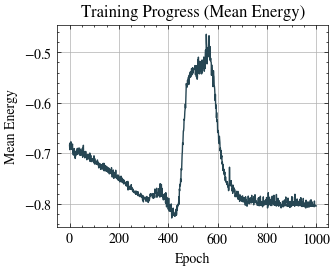

In [8]:
# %load_ext line_profiler

#! Initialization
history                 =       []
sampling_times          =       []
evaluation_times        =       []
gradient_times          =       []
reconfiguration_times   =       []
update_times            =       []
epoch_times             =       [] # To store total time per epoch

#! Initial values for display before first epoch calculation
means                   =       float('nan')
stds                    =       float('nan')

def train_function():
    #! Training Loop with tqdm
    # Use trange outside the loop variable assignment to get the progress bar object
    pbar                    = trange(n_epo, desc="Starting Training...", leave=True)
    for i in pbar:
        epoch_start_time = time.time() # Time the whole epoch

        #! 1. Sampling
        start_time      =       time.time()
        (states, logprobas), (configs, configs_ansatze), probabilities = nqs.sample(reset=False)
        sample_time     =       time.time() - start_time
        sampling_times.append(sample_time)

        #! 2. Energy Evaluation
        start_time      =       time.time()
        # Need to handle potential errors from evaluate_fun if sampling failed
        try:
            (configs, ansatze), probabilities, (v, means, stds) = nqs.evaluate_fun(
                states_and_psi  = (configs, configs_ansatze),
                probabilities   = probabilities,
                functions       = None, # means that we evaluate energy
                batch_size      = batch_size
            )
        except Exception as e:
            print(f"\nError during energy evaluation in epoch {i+1}: {e}")
            print("Stopping training.")
            break
        eval_time       =       time.time() - start_time
        evaluation_times.append(eval_time)

        # Check for NaN in energy early
        if np.isnan(means):
            print(f"\nNaN detected in energy calculation at epoch {i+1}, stopping training.")
            # Optionally print some state info for debugging
            # print("Last configs:", configs)
            break

        #! 3. Gradient Computation
        start_time      =       time.time()
        try:
            grad        =       nqs.gradient(states=configs, batch_size=batch_size, params=nqs.get_params())
            # print(grad.shape)
        except Exception as e:
            print(f"\nError during gradient calculation in epoch {i+1}: {e}")
            print("Stopping training.")
            break # Exit loop on gradient error
        grad_time       =       time.time() - start_time
        gradient_times.append(grad_time)

        #! 4. Stochastic Reconfiguration
        start_time      =       time.time()
        try:
            # Ensure v (loss) and grad (var_deriv) are correctly shaped and typed
            # v should be (n_samples,) real array (E_loc - E_mean)
            # grad should be (n_samples, n_params) complex array (O_k or O_k^*)
            if not isinstance(v, (np.ndarray, jnp.ndarray)) or v.ndim != 1:
                print(f"\nWarning: Unexpected format for 'loss' (v) in epoch {i+1}. Shape: {getattr(v, 'shape', 'N/A')}")
            if not isinstance(grad, (np.ndarray, jnp.ndarray)) or grad.ndim != 2:
                print(f"\nWarning: Unexpected format for 'var_deriv' (grad) in epoch {i+1}. Shape: {getattr(grad, 'shape', 'N/A')}")

            # Ensure x0 matches the *complex* dtype of the expected solution
            # SR solution df.x should match gradient complexity
            expected_dtype  = grad.dtype
            x0_sr           = jnp.zeros_like(grad[0, :], dtype=expected_dtype)
            df              =       SR.solve_jax(
                solve_func      = solver_linalg_func,
                loss            = v,
                var_deriv       = grad,
                min_sr          = False,
                x0              = x0_sr,
                precond_apply   = precond_apply,
                maxiter         = 500,
                tol             = pinv
            )
            # s_c             =  SR.derivatives_centered_jax(grad, jnp.mean(grad, axis = 0))
            # s_c_h           =  jnp.conjugate(s_c.T)
            # loss_c          =  SR.loss_centered_jax(v, means)
            # df              =  SR.gradient_jax(s_c_h, loss_c, loss_c.shape[0])
            # df              =  solvers.SolverResult(x=df, converged=True, residual_norm=None, iterations=None)
        except Exception as e:
            print(f"\nError during SR calculation in epoch {i+1}: {e}")
            print(f"SR Input shapes/dtypes: loss={v.shape}/{v.dtype}, var_deriv={grad.shape}/{grad.dtype}")
            print("Stopping training.")
            break
        reconfig_time       =       time.time() - start_time
        reconfiguration_times.append(reconfig_time)

        #! 5. Update Network Parameters
        start_time          =       time.time()
        try:
            # The update step: parameters = parameters - learning_rate * df.x
            # nqs.update_parameters expects the full step (-lr * df.x)
            nqs.update_parameters(df.x, -lr)
        except Exception as e:
            print(f"\nError during parameter update in epoch {i+1}: {e}")
            print(f"Update step shape/dtype: {df.x.shape}/{df.x.dtype}")
            print("Stopping training.")
            break
        update_time         =       time.time() - start_time
        update_times.append(update_time)

        # --- Store history and update progress bar ---
        history.append(means)
        epoch_time = time.time() - epoch_start_time
        epoch_times.append(epoch_time)

        # Update tqdm description and postfix
        pbar.set_description(f"Epoch {i + 1}/{n_epo}")
        postfix_dict = {
            "E_mean"    : f"{means:.6f}",
            "E_std"     : f"{stds:.4f}",
            "t_samp"    : f"{sample_time:.3e}s",
            "t_eval"    : f"{eval_time:.3e}s",
            "t_grad"    : f"{grad_time:.3e}s",
            "t_sr"      : f"{reconfig_time:.3e}s",
            "t_update"  : f"{update_time:.3e}s",
            "t_epoch"   : f"{epoch_time:.3e}s"
        }
        pbar.set_postfix(postfix_dict, refresh=True)
        # print(nqs.get_params())

    #! End of Loop
    pbar.close()
    return history, sampling_times, evaluation_times, gradient_times, reconfiguration_times, update_times, epoch_times


# %lprun -f train_function history, sampling_times, evaluation_times, gradient_times, reconfiguration_times, update_times, epoch_times = train_function()
# %lprun -f train_function history, sampling_times, evaluation_times, gradient_times, reconfiguration_times, update_times, epoch_times = train_function()

history, sampling_times, evaluation_times, gradient_times, reconfiguration_times, update_times, epoch_times = train_function()

#! Final Summary
if history:
    print("\n--- Training Finished ---")
    print(f"Completed {len(history)} epochs.")
    print(f"Final Mean Energy: {history[-1]:.6f}")

    # Calculate averages only on successful steps
    avg_sampling_time           = np.mean(sampling_times) if sampling_times else float('nan')
    avg_evaluation_time         = np.mean(evaluation_times) if evaluation_times else float('nan')
    avg_gradient_time           = np.mean(gradient_times) if gradient_times else float('nan')
    avg_reconfiguration_time    = np.mean(reconfiguration_times) if reconfiguration_times else float('nan')
    avg_epoch_time              = np.mean(epoch_times) if epoch_times else float('nan')
    avg_update_time             = np.mean(update_times) if update_times else float('nan')

    print("\nTiming Summary (Average per epoch):")
    print(f"{'Step':<30}{'Average Time (s)':<20}")
    print(f"{'-'*50}")
    print(f"{'Sampling':<30}{avg_sampling_time:<20.3e}")
    print(f"{'Energy Evaluation':<30}{avg_evaluation_time:<20.3e}")
    print(f"{'Gradient Computation':<30}{avg_gradient_time:<20.3e}")
    print(f"{'Stochastic Reconfiguration':<30}{avg_reconfiguration_time:<20.3e}")
    print(f"{'Parameter Update':<30}{avg_update_time:<20.3e}")
    print(f"{'Total Epoch':<30}{avg_epoch_time:<20.3e}")

    # --- Plotting ---
    plt.figure(1)               # Create a new figure
    plt.plot(np.real(history))  # Plot real part of energy history
    plt.xlabel("Epoch")
    plt.ylabel("Mean Energy")
    plt.title("Training Progress (Mean Energy)")
    plt.grid(True)
    plt.show()
else:
    print("\nTraining did not complete any epochs.")

#### Train loop small

In [3]:
%load_ext line_profiler

sr_options = SR.SRParams(
    min_sr          = False,
    maxiter         = 500,
    tol             = 1e-8,
    reg             = 1.0,
    # Solver parameters
    solver_form_s   = False,
)

solver_fun  = solver_linalg_func
precond_fun = precond_apply
print(solver_fun)
print(precond_fun)

# functions
ansatz      = nqs.ansatz
loc_energy  = nqs.local_energy
flat_grad   = nqs.flat_grad
batch_size  = 5
print(ansatz)
print(loc_energy)
print(flat_grad)

# @jax.jit

def single_step_train(i: int):
    #! Generate samples
    time_start  = time.time()
    (states, logprobas), (configs, configs_ansatze), probabilities = nqs.sample(reset=False)
    time_sample = time.time() - time_start

    #! Single step in the NQS
    time_start  = time.time()
    dpar, step_info, (shapes, sizes, iscpx) = nqs.single_step_jax(
        params              = nqs.get_params(),
        configs             = configs,
        configs_ansatze     = configs_ansatze,
        probabilities       = probabilities,
        apply_fn            = ansatz,
        local_energy_fun    = loc_energy,
        flat_grad_fun       = flat_grad,
        #! Stochastic reconfiguration
        use_sr              = True,
        sr_options          = sr_options,
        sr_precond_apply_fun= precond_fun,
        sr_solve_linalg_fun = solver_fun,
        batch_size          = batch_size,
    )
    time_single_step        = time.time() - time_start
    
    if step_info.failed:
        return None, (None, time_sample, time_single_step)
    
    #! Update the parameters
    time_start  = time.time()
    nqs.update_parameters(dpar, -lr, shapes, sizes, iscpx)
    time_update = time.time() - time_start
    
    #! Return the mean energy
    return step_info.mean_energy, (time_update, time_sample, time_single_step)

def train_function():
    energies = []
    for n in range(n_epo):
        
        time_start  = time.time() # Time the whole epoch
        mean_energy, (time_update, time_sample, time_single_step) = single_step_train(n)
        time_end    = time.time() - time_start
        
        if mean_energy is not None:
            energies.append(mean_energy)
            print(f"Epoch {n + 1}/{n_epo} - Step Info: {mean_energy}, t_up:{time_update:.3e}, t_s:{time_sample:.3e}, t_ss:{time_single_step:.3e}, t_epoch:{time_end:.3e}")
        else:
            print(f"Epoch {n + 1}/{n_epo} - Step failed, stopping training.")
            break
    return energies

# %lprun -f train_function energies = train_function()
energies = train_function()

<PjitFunction of <function Solver._solver_wrap_compiled.<locals>.wrapper_jax_fisher at 0x7060287419e0>>
<PjitFunction of <function Preconditioner.get_apply_gram.<locals>.wrapped_apply_gram at 0x706028740e00>>
<PjitFunction of <function FlaxInterface._compile_functions.<locals>.compiled_apply at 0x7060294893a0>>
<PjitFunction of <function local_energy_jax_wrap.<locals>.final_wrapper at 0x706028946700>>
<PjitFunction of <function flat_gradient_cpx_holo_jax at 0x7060295b44a0>>
Epoch 1/1000 - Step Info: (0.5665852640874353+0.007222678212894373j), t_up:8.554e-02, t_s:1.074e+00, t_ss:8.877e-01, t_epoch:2.047e+00
Epoch 2/1000 - Step Info: (0.6225280983241949-0.009144544482574145j), t_up:7.088e-04, t_s:6.332e-03, t_ss:7.020e-03, t_epoch:1.418e-02
Epoch 3/1000 - Step Info: (0.5324089152651059+0.007129655264785282j), t_up:8.812e-04, t_s:4.560e-03, t_ss:6.857e-03, t_epoch:1.241e-02
Epoch 4/1000 - Step Info: (0.5836697216540458-0.01316842433960808j), t_up:6.113e-04, t_s:4.751e-03, t_ss:6.108e-03, 


--- Training Finished ---
Completed 2000 epochs.
Final Mean Energy: -1.184076-0.000586j


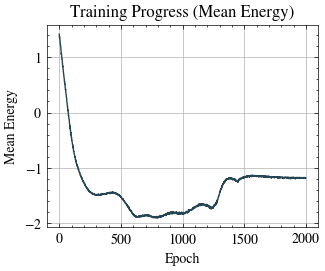

In [46]:
if energies:
    print("\n--- Training Finished ---")
    print(f"Completed {len(energies)} epochs.")
    print(f"Final Mean Energy: {energies[-1]:.6f}")

    # --- Plotting ---
    plt.figure(1)               # Create a new figure
    plt.plot(np.real(energies))  # Plot real part of energy history
    plt.xlabel("Epoch")
    plt.ylabel("Mean Energy")
    plt.title("Training Progress (Mean Energy)")
    plt.grid(True)
    plt.show()
else:
    print("\nTraining did not complete any epochs.")

In [5]:
# plt.plot(np.real(history))
history

[]

In [9]:
ham.build(verbose=True, use_numpy=True)
ham.diagonalize(verbose=True)

INFO:general_python.common.flog:241: 	->[Transverse Field Ising Model] Building the Hamiltonian matrix...
INFO:general_python.common.flog:241: 		->[Transverse Field Ising Model] Initialization completed in 0.000588 seconds
INFO:general_python.common.flog:241: 		->[Transverse Field Ising Model] Calculating the Hamiltonian matrix using NumPy...
INFO:general_python.common.flog:241: 	->[Transverse Field Ising Model] Hamiltonian matrix built in 0.893487 seconds.
INFO:general_python.common.flog:241: 	->[Transverse Field Ising Model] Diagonalization started using (standard)...
INFO:general_python.common.flog:241: 		->[Transverse Field Ising Model] Diagonalization (standard) completed in 0.031285 seconds.


In [10]:
# plt.plot(ham.eig_val)
ham.eig_val[:5]

array([-2.72819622, -2.62424739, -2.35908412, -2.35908412, -2.3380676 ])

### Test the ansatz again

In [5]:
%%timeit -r 5 -n 5 
ansatz, shape = nqsmodule.test_net_ansatz(nqs)

The slowest run took 5.18 times longer than the fastest. This could mean that an intermediate result is being cached.
327 μs ± 235 μs per loop (mean ± std. dev. of 5 runs, 5 loops each)


### Check the params

In [3]:
# params      = net.get_params()

# k0 = params['params']['Dense_0']['kernel']
# b0 = params['params']['Dense_0']['bias']
# k1 = params['params']['Dense_1']['kernel']
# b1 = params['params']['Dense_1']['bias']
# print("dense 0:", (k0.shape, b0.shape))
# print("dense 1:", (k1.shape, b1.shape))
# params['params']


#### Run the example

In [ ]:
import Python.QES.general_python.ml.net_impl.networks.net_simple_flax as simple_flax
simple_flax.example()

DEBUG: Initializing Flax module. self.input_shape = (10,)
DEBUG: self.input_dim = 10
DEBUG: Creating dummy input with shape: (1, 10), dtype: float32


Array([[1.0123879],
       [1.0123879],
       [1.0123879],
       [1.0123879],
       [1.0123879]], dtype=float32)

### Evaluate through solver

In [5]:
# %%timeit -r 2 -n 2
# apply through the solver with the states
(configs, ansatze), probabilities, (v, means, stds) = nqs.evaluate_fun(batch_size = 1)
means, stds

(Array(128.86084318+36.35979072j, dtype=complex128),
 Array(241.43732257, dtype=float64))

### Check whether one can calculate the gradient for the energies directly

In [10]:
import jax

def loss_fn(params):
    # recompute v with the given parameters
    (configs, ansatze), probabilities, (v, means, stds) = nqs.evaluate_fun(batch_size=10)
    return means
params      = net.get_params()
grad_loss   = jax.grad(loss_fn, holomorphic=True)(params)
print(grad_loss)

{'Dense_0': {'bias': Array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j], dtype=complex128), 'kernel': Array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]], dtype=complex128)}, 'Dense_1': {'bias': Array([0.+0.j], dtype=complex128), 'kernel': Array([[0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j]], dtype=complex128)}}


### Check whether one can calculate the gradient for the ansatz

In [3]:
# apply through the solver with the states
(configs, ansatze), probabilities, (v, means, stds) = nqs.evaluate_fun(batch_size = 10)
means, stds, configs.shape, ansatze.shape, probabilities.shape

ValueError: axis 0 is out of bounds for array of dimension 0

#### Directly

In [12]:
import general_python.ml.net_impl.utils.net_utils as net_utils
import jax 
# create the batches
sb              = net_utils.jaxpy.create_batches_jax(configs, batch_size = 3)
print(sb.shape)
apply_f, params = net.get_apply(use_jax=True)
print(apply_f(params, sb[0]).shape)

# compute the gradients using JAX's vmap and scan
# use the provided flat_grad_fun to compute the gradients
# this is a function that computes the gradients of the network
def scan_fun(c, x):
    return c, jax.vmap(lambda y: net_utils.jaxpy.flat_gradient_holo_numerical_jax(apply_f, params, y), in_axes=(0,))(x)

# use jax's scan to compute the gradients of the logarithmic wave function
g = jax.lax.scan(scan_fun, None, sb)[1]
from jax import tree_util

g = tree_util.tree_map(lambda x: x.reshape((-1,) + x.shape[2:]), g)
g = tree_util.tree_map(lambda x: x[:configs.shape[0]], g)

# # g = jax.tree_map(lambda x: x / jax.lax.norm(x), g)
g.shape
g

(9, 3, 10)
(3, 1)


Array([[ 0.65866542+0.40745464j, -0.96497238+0.08639439j,
         1.39652574-0.17228837j, ..., -0.02979387+1.4212116j ,
         0.46657672+1.13146494j,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         1.39652574-0.17228837j, ...,  0.34756038+0.38114775j,
         0.        +0.j        ,  0.47825681+0.02549799j],
       [ 0.65866542+0.40745464j, -0.96497238+0.08639439j,
         1.39652574-0.17228837j, ..., -0.76903558+0.32339689j,
         0.        +0.j        , -0.47113513+0.7089595j ],
       ...,
       [ 0.        +0.j        , -0.96497238+0.08639439j,
         0.        +0.j        , ...,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         1.39652574-0.17228837j, ...,  0.6245665 +0.16962344j,
        -0.02625485+1.18055515j,  0.        +0.j        ],
       [ 0.65866542+0.40745464j,  0.        +0.j        ,
         0.        +0.j       

#### Through the solver

In [13]:
# through the solver
g = nqs.gradient(configs, batch_size=3)
g.shape
g

Array([[ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        , ...,  0.        +0.j        ,
         0.        +0.j        , -0.32002134+0.22016215j],
       [ 0.65866542+0.40745464j, -0.96497238+0.08639439j,
         1.39652574-0.17228837j, ...,  0.3286974 +0.65195047j,
         0.        +0.j        ,  0.68316557+0.77572485j],
       [ 0.        +0.j        , -0.96497238+0.08639439j,
         1.39652574-0.17228837j, ...,  0.18765405+0.27717504j,
         0.        +0.j        ,  0.28474208+0.13324456j],
       ...,
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        , ...,  0.        +0.j        ,
         0.48503316+0.61455249j,  0.23406688+0.05146329j],
       [ 0.65866542+0.40745464j, -0.96497238+0.08639439j,
         0.        +0.j        , ...,  0.        +0.j        ,
        -0.04850227+0.20163243j,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         1.39652574-0.17228837

#### Try out standard gradient vector

In [14]:
samples     = v.shape[0]
e_centered  = (v - means)

# derivatives centered
g_means     = jnp.mean(g, axis = 0)
g_means.shape, e_centered.shape

((122,), (25,))

In [15]:
g_centered  = g - g_means
g_centered.shape

(25, 122)

In [16]:
# get F
F = jnp.matmul(jnp.conj(g_centered).T, e_centered) / samples
F.shape

(122,)

In [17]:
nqs.update_parameters(F)
net.get_params()

KeyError: 'params'

### Try out Stochastic Reconfiguration and gradient parameter

In [12]:
# try out stochastic reconfiguration
samples = v.shape[0]
v.shape, g.shape

((200,), (200, 122))

In [13]:
e_centered  = (v - means)

# derivatives centered
g_means     = jnp.mean(g, axis = 0)
g_means.shape, e_centered.shape

((122,), (200,))

In [14]:
g_centered  = g - g_means
g_centered.shape

(200, 122)

In [15]:
g_centered_c_t = jnp.conj(g_centered).T

In [16]:
# get F
F = jnp.matmul(g_centered_c_t, e_centered)
F.shape

(122,)

In [17]:
S = jnp.matmul(g_centered_c_t, g_centered) / samples
S.shape

(122, 122)

In [18]:
# use standard solver
dF = jnp.linalg.pinv(S, 1e-5) * F
dF.shape
dF

DeviceArray([[-3.93554855e+03+5.33812768e+03j,
               7.62498881e+00+1.15546464e+00j,
              -2.11245699e+02-1.75518038e+02j, ...,
               1.72283782e+02+1.94078715e+03j,
              -3.48546042e+02-1.49834946e+03j,
              -3.32953450e+02+4.69936990e+02j],
             [-2.22128851e+01-4.99460437e+01j,
              -1.34701147e+03+1.70924399e+03j,
               2.01349750e+02-7.58985694e+01j, ...,
               4.59210850e+03+2.74385215e+03j,
               1.55533214e+03+1.30541734e+03j,
              -1.00787909e+02+3.97334206e+01j],
             [ 1.00727776e+03+4.52922726e+02j,
              -7.60509629e+00-1.21841041e+02j,
              -1.19186272e+03+2.28626133e+03j, ...,
               2.73049858e+03-1.70319819e+01j,
               7.35045580e+02-8.81476689e+02j,
               1.44884004e+03-7.05229453e+01j],
             ...,
             [ 4.91581972e+02-9.01879088e+02j,
               3.96034578e+02-3.81158095e+01j,
               3.4575049

### Try the stochastic reconfiguration class (with solver)

In [ ]:
# setup the solver
import general_python.algebra.solver as solver_mod

<module 'general_python.algebra.solver' from '/home/klimak/Codes/QuantumEigenSolver/Python/QES/general_python/algebra/solver.py'>

###### a) Without MINSR - solver = direct - no covariance S

In [9]:
from general_python.algebra.solvers import stochastic_rcnfg as sr

# get the samples - apply through the solver with the states
(configs, ansatze), probabilities, (v, means, stds) = nqs.evaluate_fun(batch_size = 10)
means, stds, configs.shape, ansatze.shape, probabilities.shape

# get the derivatives - through the solver
g = nqs.gradient(configs, batch_size=3)
g.shape

# create the sr
stochastic_reconfiguration = sr.StochasticReconfiguration(None, backend='jax')
stochastic_reconfiguration

In [4]:
stochastic_reconfiguration.set_values(loss  =   v, 
                                derivatives =   g,
                                mean_loss   =   means,
                                mean_deriv  =   None,
                                calculate_s =   False, 
                                use_minsr   =   False)

f = stochastic_reconfiguration.forces
s = stochastic_reconfiguration.covariance_matrix

f.shape, s.shape
f, s

NameError: name 'stochastic_reconfiguration' is not defined

In [13]:
stochastic_reconfiguration.covariance_matrix, stochastic_reconfiguration.forces

(DeviceArray([[ 745.15788636  +0.j        ,  -66.73252033 +85.93926648j,
                -98.5109987 +154.67123818j, ...,
               -209.94125982 +24.31248764j,  219.1822494 -123.03491681j,
                  0.          +0.j        ],
              [ -66.73252033 -85.93926648j,   15.88762195  +0.j        ,
                 26.660417    -2.49026228j, ...,
                 21.60522895 +22.03528218j,  -33.81848985 -14.25997342j,
                  0.          +0.j        ],
              [ -98.5109987 -154.67123818j,   26.660417    +2.49026228j,
                 77.36257027  +0.j        , ...,
                 16.33149124 +38.77137793j,  -62.51135673 -29.44222441j,
                  0.          +0.j        ],
              ...,
              [-209.94125982 -24.31248764j,   21.60522895 -22.03528218j,
                 16.33149124 -38.77137793j, ...,
                 71.51043787  +0.j        ,  -61.67045844 +27.22622149j,
                  0.          +0.j        ],
              [ 219.1

In [14]:
solution = stochastic_reconfiguration.solve(use_s = True, use_minsr = False)
solution.shape
solution.shape

(122,)

###### b) With MINSR - solver = direct - no covariance S

In [15]:
from general_python.algebra.solvers import stochastic_rcnfg as sr

# get the samples - apply through the solver with the states
(configs, ansatze), probabilities, (v, means, stds) = nqs.evaluate_fun(batch_size = 10)
means, stds, configs.shape, ansatze.shape, probabilities.shape

# get the derivatives - through the solver
g = nqs.gradient(configs, batch_size=3)
g.shape

# create the sr
stochastic_reconfiguration = sr.StochasticReconfiguration(None, backend='jax')
stochastic_reconfiguration

In [16]:
stochastic_reconfiguration.set_values(loss  =   v, 
                                derivatives =   g,
                                mean_loss   =   means,
                                mean_deriv  =   None,
                                calculate_s =   False, 
                                use_minsr   =   True)

f = stochastic_reconfiguration.forces
s = stochastic_reconfiguration.covariance_matrix

f.shape, s.shape

((122,), (200, 200))

### Train it!

In [29]:
nqs.reset()

In [33]:
energies = nqs.train(10)

In [34]:
energies

[DeviceArray(38.1857513-16.84196292j, dtype=complex128),
 DeviceArray(35.67420013-9.09484688j, dtype=complex128),
 DeviceArray(7.01671317+6.80436354j, dtype=complex128),
 DeviceArray(12.10060309-1.30004229j, dtype=complex128),
 DeviceArray(41.56942016+18.19404729j, dtype=complex128),
 DeviceArray(7.50651683-0.00095753j, dtype=complex128),
 DeviceArray(7.57187319-0.0018718j, dtype=complex128),
 DeviceArray(7.58687055-0.00189599j, dtype=complex128),
 DeviceArray(7.58524812-2.5173871e-05j, dtype=complex128),
 DeviceArray(7.64093191-0.00096358j, dtype=complex128)]

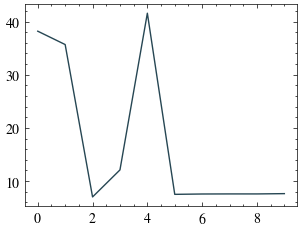

In [36]:
import matplotlib.pyplot as plt
plt.plot(energies)

In [38]:
ham.build(use_numpy=True)
ham.diagonalize()
ham.eig_val

array([-11.92531811, -11.92531811, -11.38886164, ...,  11.38886164,
        11.92531811,  11.92531811])

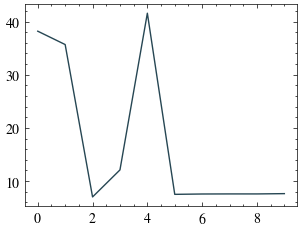

In [37]:
plt.plot(energies)
# plt.axhline(energies[0])
